<a href="https://colab.research.google.com/github/himanshu683663/Capstone_project_1_EDA_Play_Store_App_Analysis/blob/main/Capstone_Project_(EDA)_Play_store_App_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##     <b>EDA on Play Store apps and User Reviews
    
  

### <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

### <b> Each app (row) has values for catergory, rating, size, etc. . Another dataset contains customer/user reviews of the android applications.</b>

### <b> Explore and analyze the data to discover the key factors responsible for app engagement and success. </b>

In [ ]:
import pandas as pd
import numpy as np
# seaborn is a library used for EDA
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Let's import  concerned play store dataset 
playstore_df = pd.read_csv("/content/drive/MyDrive/CAPSTONE PROJECT  (Almabetter)/ Capstone Project (EDA) Play Store App review /Play Store Data.csv")

In [ ]:
# head() function basically yield top 5 rows of dataset .
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# tail() function yield last 5 rows of dataset 
playstore_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
# shape function derive total matrix (number)of rows and columns 
playstore_df.shape

(10841, 13)

In [ ]:
# Basically describe() overall mean,max,count,median,mode,standard deviation etc. 
playstore_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


Elimination of Duplication 

In [ ]:
# It will remove duplicates values while keeping the last occurences , invoking inplace= True will save the change in main dataset .
playstore_df.drop_duplicates(subset='App', keep='last', inplace=True)

In [ ]:
# Basically Exhibit Total shape after duplication elimination 
playstore_df.shape

(9660, 13)

In [ ]:
# describe() yields all the information regarding count,max,min
playstore_df.describe()

,Rating
count,8197.000000
mean,4.175027
std,0.560685
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
pd.set_option('display.max_columns',13)

In [ ]:
playstore_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9652 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [ ]:
#finding the null values
playstore_df.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


# Identifying Outliers 

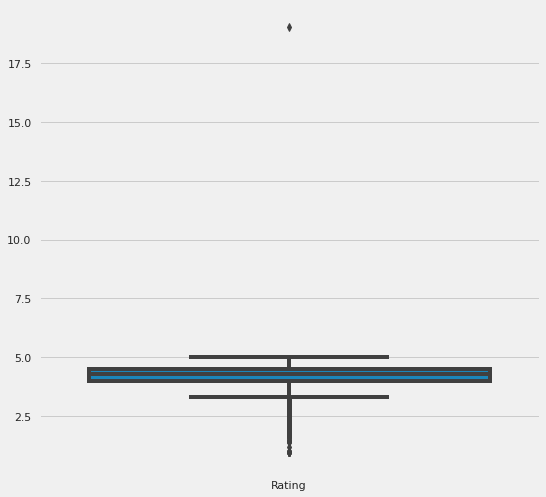

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(data=playstore_df)

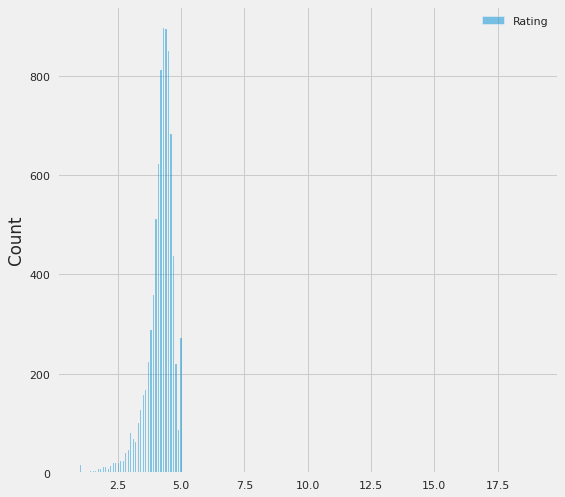

In [ ]:
#Checking outliers
plt.figure(figsize=(8,8))
sns.histplot(data=playstore_df)
plt.show()

In [ ]:
#Missing Values Count
playstore_df.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [ ]:
#Overall Outlier  Whose rating exceeding 5 Rating 
outlier = playstore_df[playstore_df['Rating']>5]
outlier

,App,Category,Rating,Reviews,Size,Installs,...,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue


### Outlier Elimination 

In [ ]:
playstore_df.drop(10472,inplace=True)

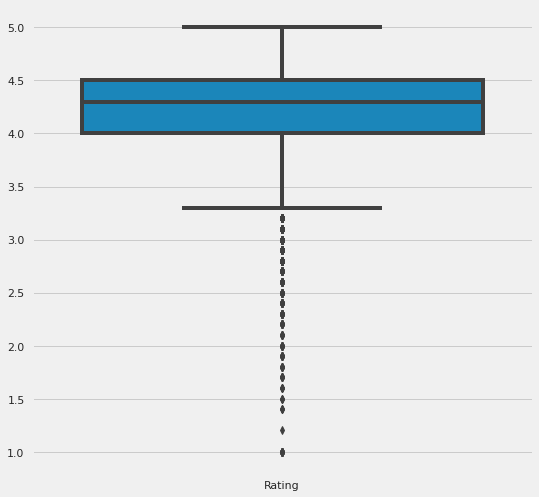

In [ ]:
#Checking the outlier with boxplot
#playstore_df.boxplot()
plt.figure(figsize=(8,8))
sns.boxplot(data=playstore_df)

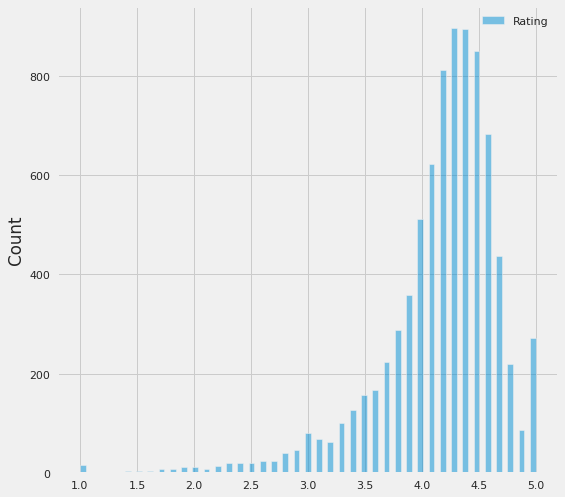

In [ ]:
plt.figure(figsize=(8,8))
sns.histplot(data=playstore_df)
plt.show()

In [ ]:
#Checking the rating more than 5 as no values are more than 5
outlier = playstore_df[playstore_df['Rating']>5]
outlier

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


The outlier has been removed

In [ ]:
# sorting by first name
playstore_df.sort_values("App", inplace = True)

#dropping ALL duplicate values
playstore_df.drop_duplicates(subset ="App",
                     keep = False, inplace = True)


In [ ]:
#Filling the null values with aggt vals like mead, median and mode
#Defining a function to impute median 
def impute_median(series):
    return series.fillna(series.median())

In [ ]:
playstore_df.Rating = playstore_df['Rating'].transform(impute_median)

In [ ]:
#Checking thr null value in the Rating column
playstore_df['Rating'].isnull().sum()

0

In [ ]:
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,4.3,27,3.6M,500+,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22M,"1,000,000+",Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up
324,- Free Comics - Comic Apps,COMICS,3.5,115,9.1M,"10,000+",Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
4541,.R,TOOLS,4.5,259,203k,"10,000+",Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
4636,/u/app,COMMUNICATION,4.7,573,53M,"10,000+",Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up


In [ ]:
playstore_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [ ]:
playstore_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
pd.DataFrame(playstore_df['Category'].unique())

,0
0,SPORTS
1,SOCIAL
2,COMICS
3,TOOLS
4,COMMUNICATION
5,NEWS_AND_MAGAZINES
6,HEALTH_AND_FITNESS
7,FAMILY
8,BOOKS_AND_REFERENCE
9,LIFESTYLE


## Substituting  up missing values

In [ ]:
# mode of categorical data that contains nan values 
print('-------------------------------------')
print(playstore_df['Type'].mode())
print('-------------------------------------')
print(playstore_df['Current Ver'].mode())
print('-------------------------------------')
print(playstore_df['Android Ver'].mode())

-------------------------------------
0    Free
dtype: object
-------------------------------------
0    Varies with device
dtype: object
-------------------------------------
0    4.1 and up
dtype: object


In [ ]:
#Filling the missing categorical values with modes 
playstore_df['Type'].fillna(str(playstore_df['Type'].mode().values[0]),inplace=True)
playstore_df['Current Ver'].fillna(str(playstore_df['Current Ver'].mode().values[0]),inplace=True)
playstore_df['Android Ver'].fillna(str(playstore_df['Android Ver'].mode().values[0]),inplace=True)


In [ ]:
#Counting the null values in each column
playstore_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,4.3,27,3.6M,500+,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22M,"1,000,000+",Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up
324,- Free Comics - Comic Apps,COMICS,3.5,115,9.1M,"10,000+",Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
4541,.R,TOOLS,4.5,259,203k,"10,000+",Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
4636,/u/app,COMMUNICATION,4.7,573,53M,"10,000+",Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up



Converting the price, rating and review into numerical column obviously in int64 type for calculation purpose otherwise you cant'do the same thing in string .

In [ ]:
# Converting the price to float
playstore_df['Price'] = playstore_df['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str(x))
playstore_df['Price'] = playstore_df['Price'].apply(lambda x: str(x).replace(',','') if '$' in str(x) else str(x))
playstore_df['Price'] = playstore_df['Price'].apply(lambda x: float(x))

In [ ]:
# Converting the installations to float 
playstore_df['Installs'] = playstore_df['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
playstore_df['Installs'] = playstore_df['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
playstore_df['Installs'] = playstore_df['Installs'].apply(lambda x: float(x))

In [ ]:
# Converting the Reviews to float
playstore_df['Reviews'] = playstore_df['Reviews'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str(x))
playstore_df['Reviews'] = playstore_df['Reviews'].apply(lambda x: str(x).replace(',','') if '$' in str(x) else str(x))
playstore_df['Reviews'] = playstore_df['Reviews'].apply(lambda x: float(x))

In [ ]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 8884 to 882
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   float64
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   float64
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9659 non-null   object 
 12  Android Ver     9659 non-null   object 
 13  Revenue         9659 non-null   float64
dtypes: float64(5), object(9)
memory usage: 1.4+ MB


Counting the free and paid apps obviously paid apps play a pivotal role in earning  revenues .

In [ ]:
#Counting the free  apps
x1 = playstore_df['Type'] == 'Free'
x1 = x1.sum()
print(x1)

#Counting the paid apps 
y1 = playstore_df['Type'] == 'Paid'
y1 = y1.sum()
print(y1)



8905
754


In [ ]:
playstore_df['Revenue'] = playstore_df['Installs'] * playstore_df['Price']
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,...,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,4.3,27.0,3.6M,500.0,...,Everyone,Sports,"October 7, 2017",0.22,4.1 and up,0.0
8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467.0,22M,1000000.0,...,Everyone,Social,"August 2, 2018",5.03,4.1 and up,0.0
324,- Free Comics - Comic Apps,COMICS,3.5,115.0,9.1M,10000.0,...,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up,0.0
4541,.R,TOOLS,4.5,259.0,203k,10000.0,...,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up,0.0
4636,/u/app,COMMUNICATION,4.7,573.0,53M,10000.0,...,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up,0.0


In [ ]:
playstore_df[playstore_df['Revenue'] == playstore_df['Revenue'].max()]

,App,Category,Rating,Reviews,Size,Installs,...,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
4347,Minecraft,FAMILY,4.5,2375336.0,Varies with device,10000000.0,...,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,69900000.0


##  Data Visualizing free and paid apps 

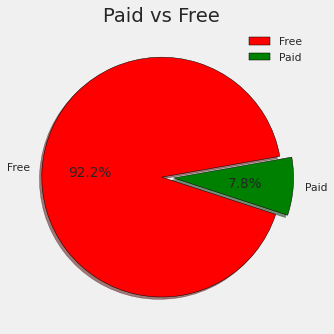

In [ ]:
#plt.style.use("fivethirtyeight")
plt.figure(figsize = (5,5),dpi = 70)
slices = [x1,y1]
labels = ['Free','Paid']  
explode = [0, 0.1]

plt.pie(slices, labels=labels, explode=explode, shadow=True, colors=['Red','Green'],
        startangle=10, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})
plt.legend( labels, loc="best")

#plt.pie(slices)
plt.title("Paid vs Free")
plt.tight_layout()
plt.show()

From the above pie chart we can consider that the maximum number of 

In [ ]:
playstore_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,...,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,4.3,27.0,3.6M,500.0,...,Everyone,Sports,"October 7, 2017",0.22,4.1 and up,0.0
8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467.0,22M,1000000.0,...,Everyone,Social,"August 2, 2018",5.03,4.1 and up,0.0
324,- Free Comics - Comic Apps,COMICS,3.5,115.0,9.1M,10000.0,...,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up,0.0
4541,.R,TOOLS,4.5,259.0,203k,10000.0,...,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up,0.0
4636,/u/app,COMMUNICATION,4.7,573.0,53M,10000.0,...,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up,0.0
5940,058.ba,NEWS_AND_MAGAZINES,4.4,27.0,14M,100.0,...,Everyone,News & Magazines,"July 6, 2018",1.0,4.2 and up,0.0
10252,1. FC Köln App,SPORTS,4.6,2019.0,41M,100000.0,...,Everyone,Sports,"July 20, 2018",1.13.0,4.4 and up,0.0
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3.8M,500000.0,...,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,0.0
8483,10 Minutes a Day Times Tables,FAMILY,4.1,681.0,48M,100000.0,...,Everyone,Education,"July 3, 2014",1.2,2.2 and up,0.0
7738,10 WPM Amateur ham radio CW Morse code trainer,COMMUNICATION,3.5,10.0,3.8M,100.0,...,Everyone,Communication,"May 12, 2018",2.1.4,2.1 and up,149.0


In [ ]:
playstore_df.describe()

,Rating,Reviews,Installs,Price,Revenue
count,9659.000000,9.659000e+03,9.659000e+03,9659.000000,9.659000e+03
mean,4.192422,2.166512e+05,7.794247e+06,1.097231,3.014185e+04
std,0.496071,1.830738e+06,5.376991e+07,16.851618,8.716572e+05
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,4.000000,2.500000e+01,1.000000e+03,0.000000,0.000000e+00
50%,4.300000,9.690000e+02,1.000000e+05,0.000000,0.000000e+00
75%,4.500000,2.940100e+04,1.000000e+06,0.000000,0.000000e+00
max,5.000000,7.812821e+07,1.000000e+09,400.000000,6.990000e+07


## Data Visualisation among categories 

In [ ]:
grp = playstore_df.groupby('Category')
x = grp['Rating'].agg(np.mean)
y = grp['Price'].agg(np.sum)
z = grp['Installs'].agg(np.mean)


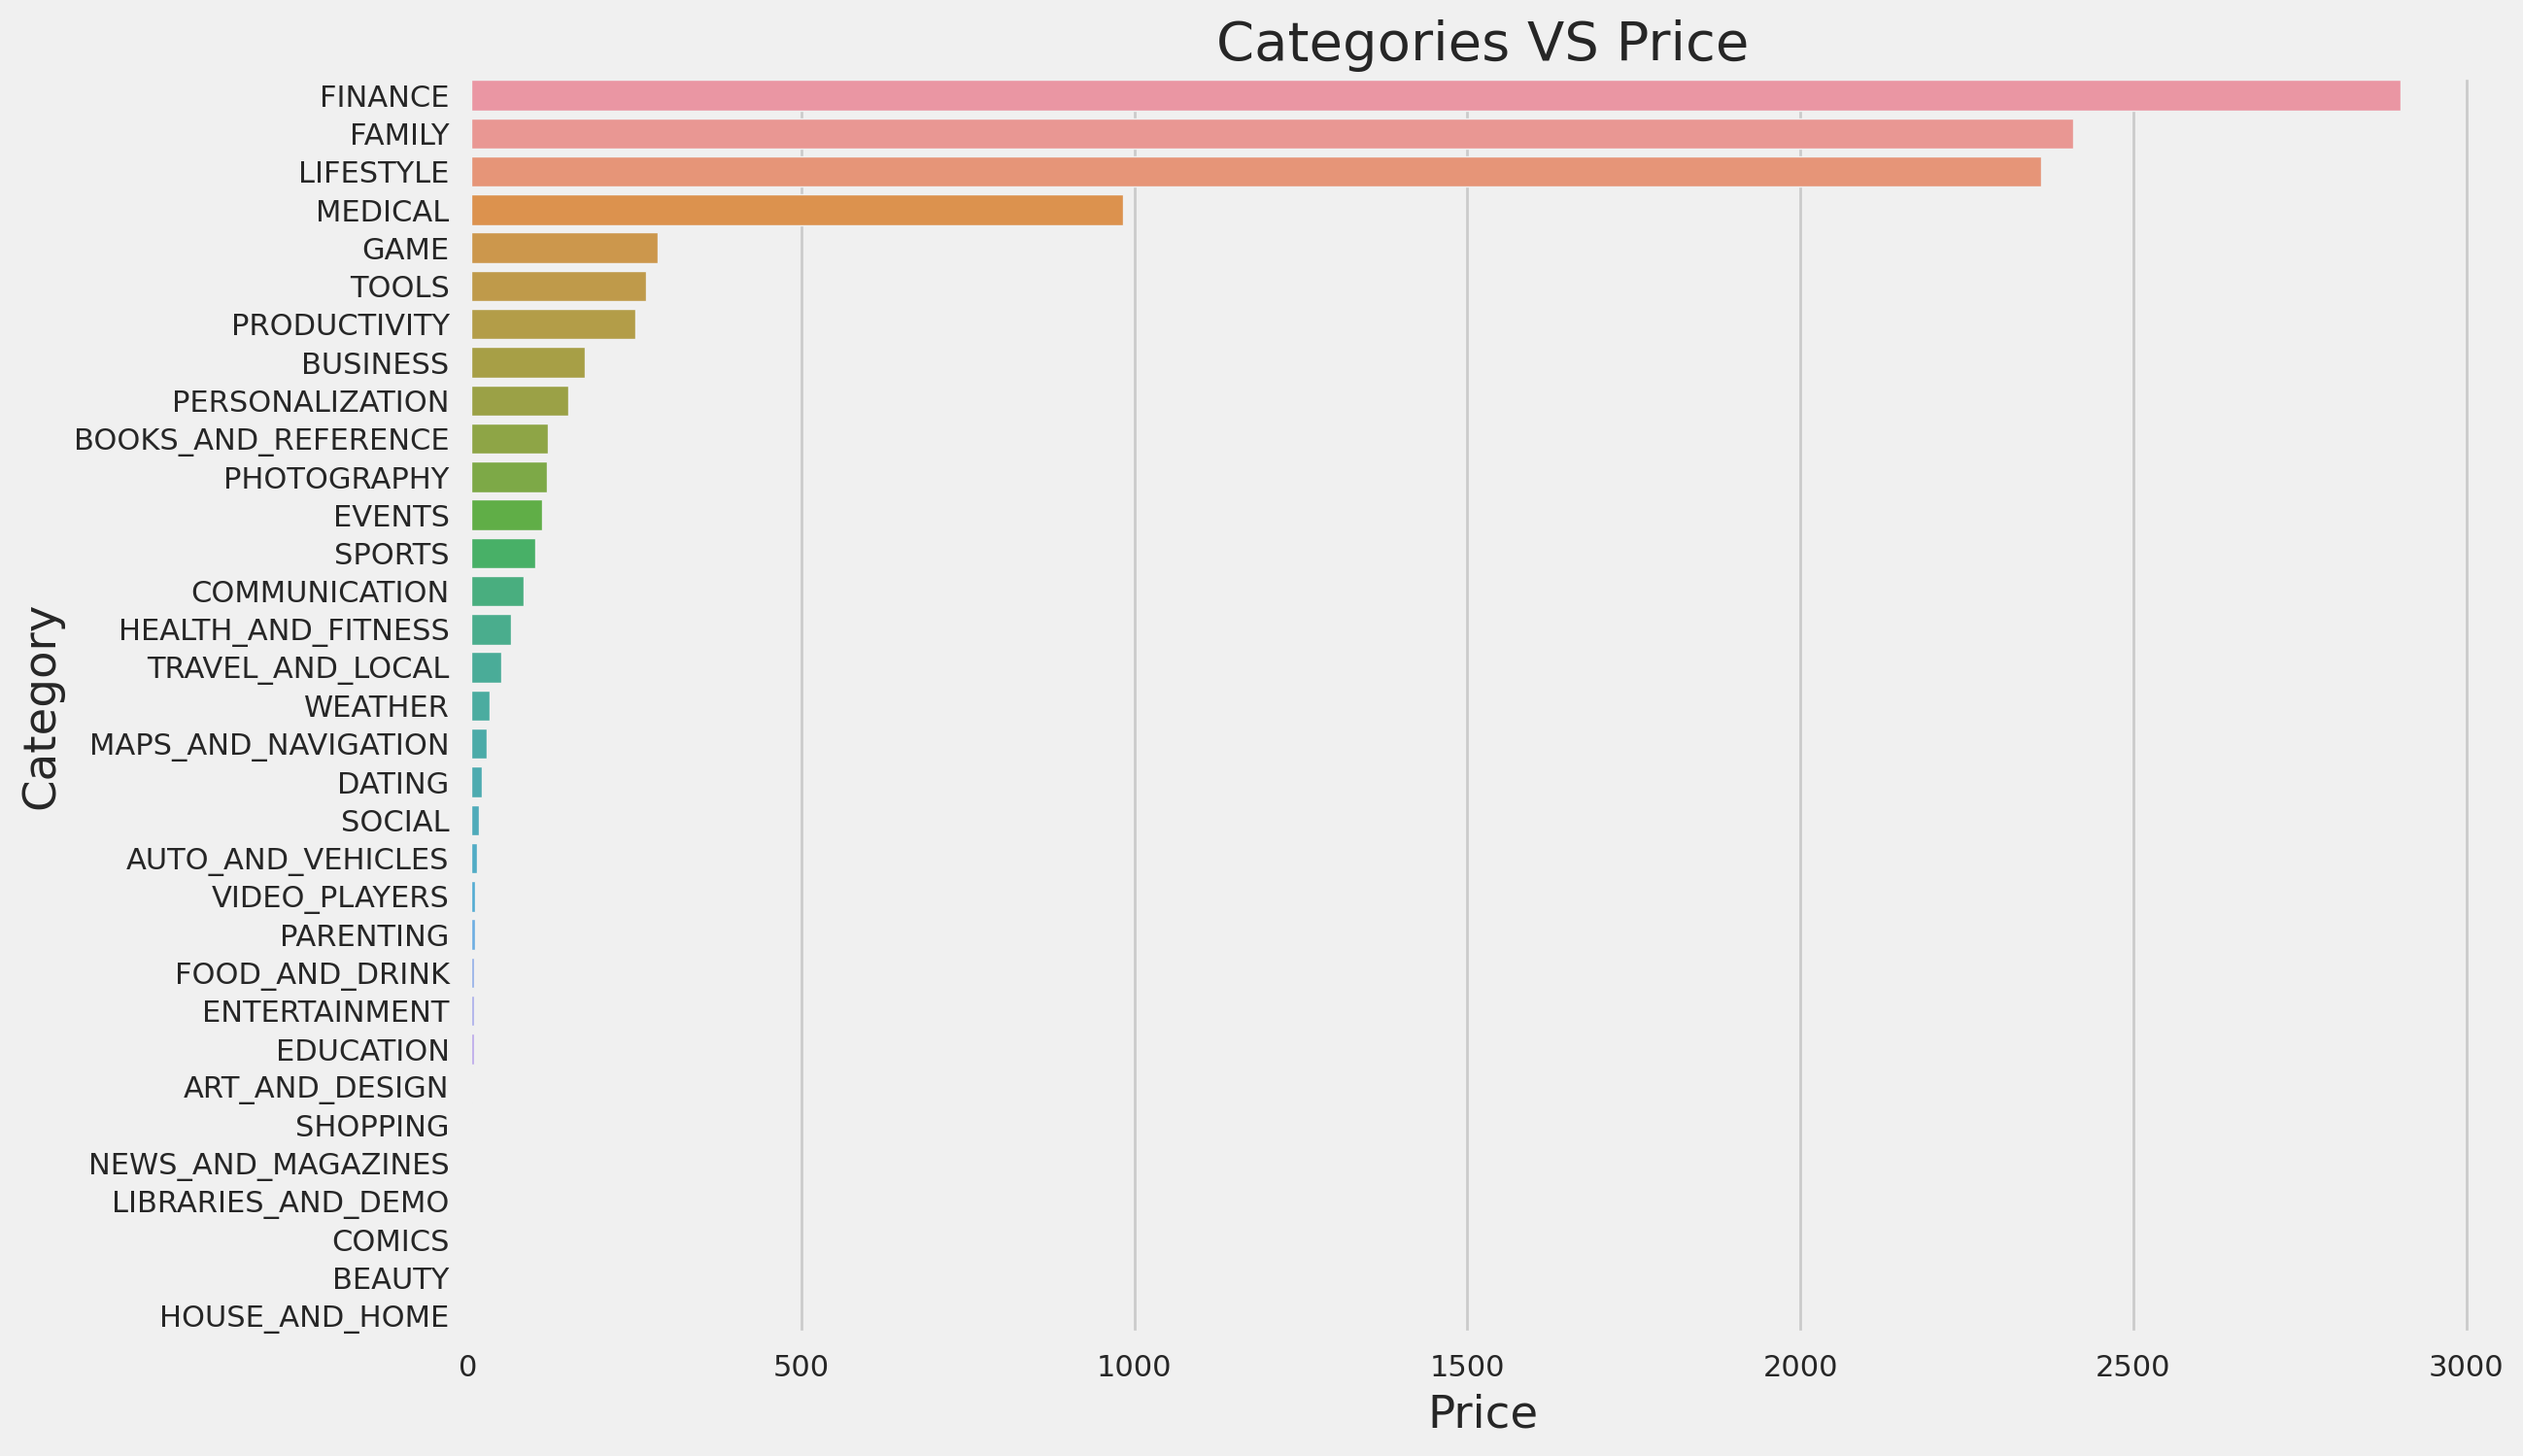

In [ ]:
# plt.figure(figsize =(12,8),dpi=200)
# dum1 = playstore_df.groupby(['Category']).sum()['Price']
# dum1 = dum.sort_values(ascending=False)
# plt.title('Category vs Price')
# sns.barplot(y= dum.index, x=dum)
# plt.show()

plt.figure(figsize = (12,8), dpi = 200)
df = playstore_df.groupby(['Category']).sum()['Price']
df = df.sort_values(ascending = False)
sns.barplot(y=df.index,x=df)
##plt.xticks(rotation=90)
plt.title('Categories VS Price')
plt.show()

### Category vs Installs  

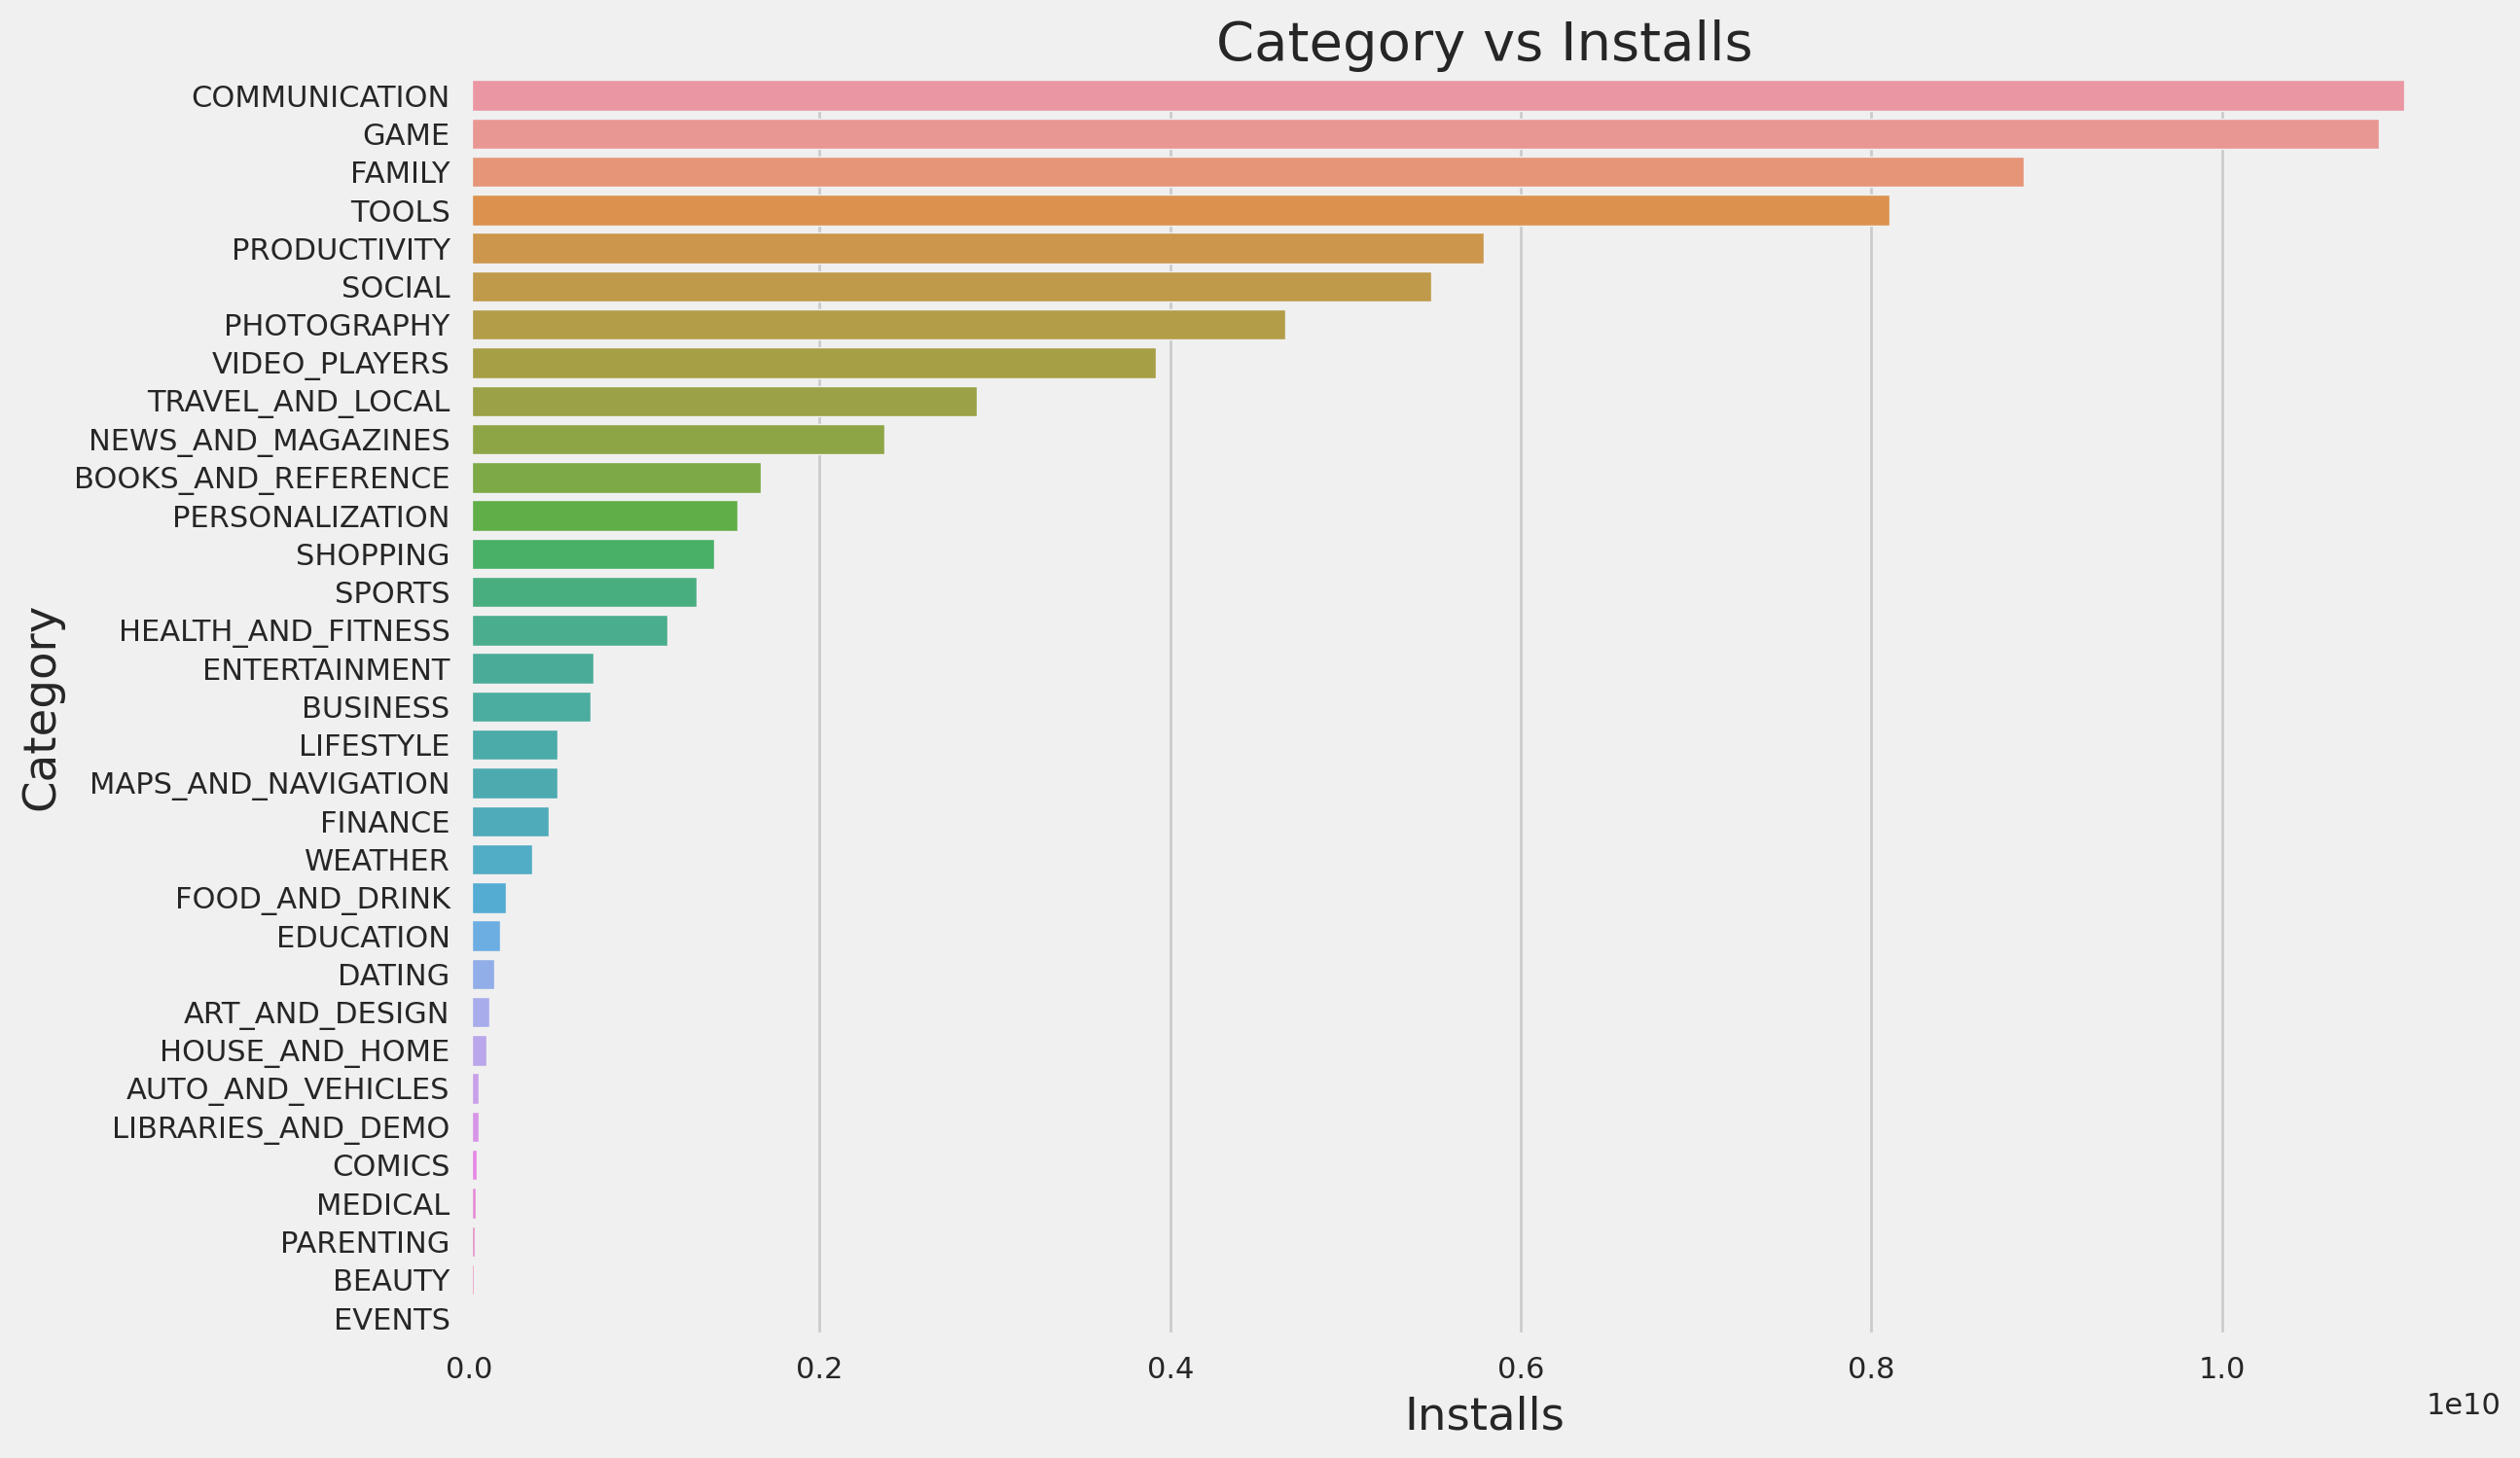

In [ ]:
plt.figure(figsize =(12,8),dpi=200)
dum = playstore_df.groupby(['Category']).sum()['Installs']
dum = dum.sort_values(ascending=False)
plt.title('Category vs Installs')
sns.barplot(y= dum.index, x=dum)
plt.show()

In [ ]:
pd.DataFrame(dum.head(10))

,Installs
Category,
COMMUNICATION,1.103928e+10
GAME,1.089792e+10
FAMILY,8.870643e+09
TOOLS,8.102772e+09
PRODUCTIVITY,5.788091e+09
SOCIAL,5.487868e+09
PHOTOGRAPHY,4.658148e+09
VIDEO_PLAYERS,3.917003e+09
TRAVEL_AND_LOCAL,2.894887e+09


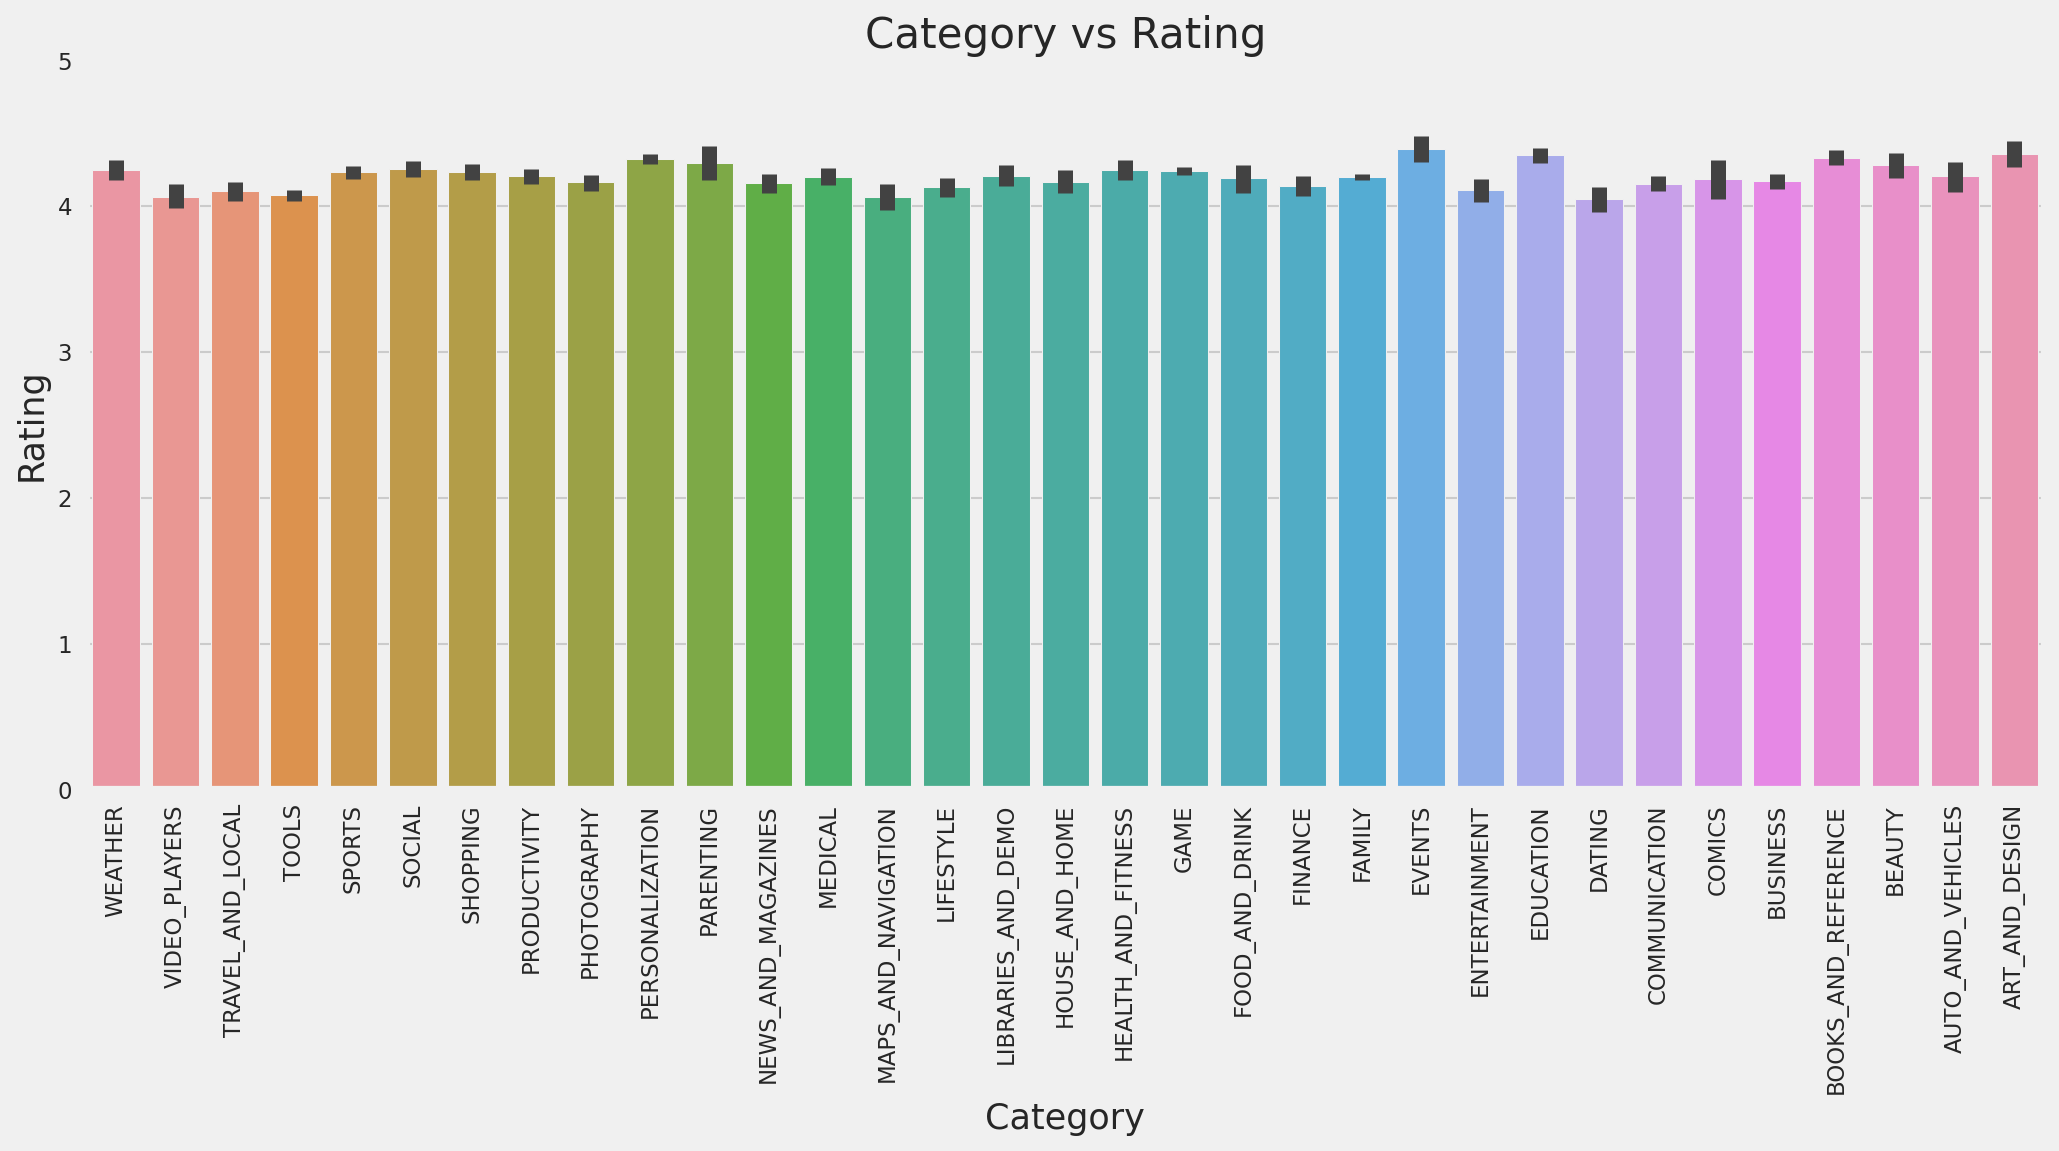

In [ ]:
plt.figure(figsize = (15,6),dpi = 150)
sns.barplot(y=playstore_df['Rating'],x=playstore_df['Category'].sort_values(ascending=False))
plt.xticks(rotation = 90)
plt.ylim(0,5)
plt.title('Category vs Rating')
plt.show()

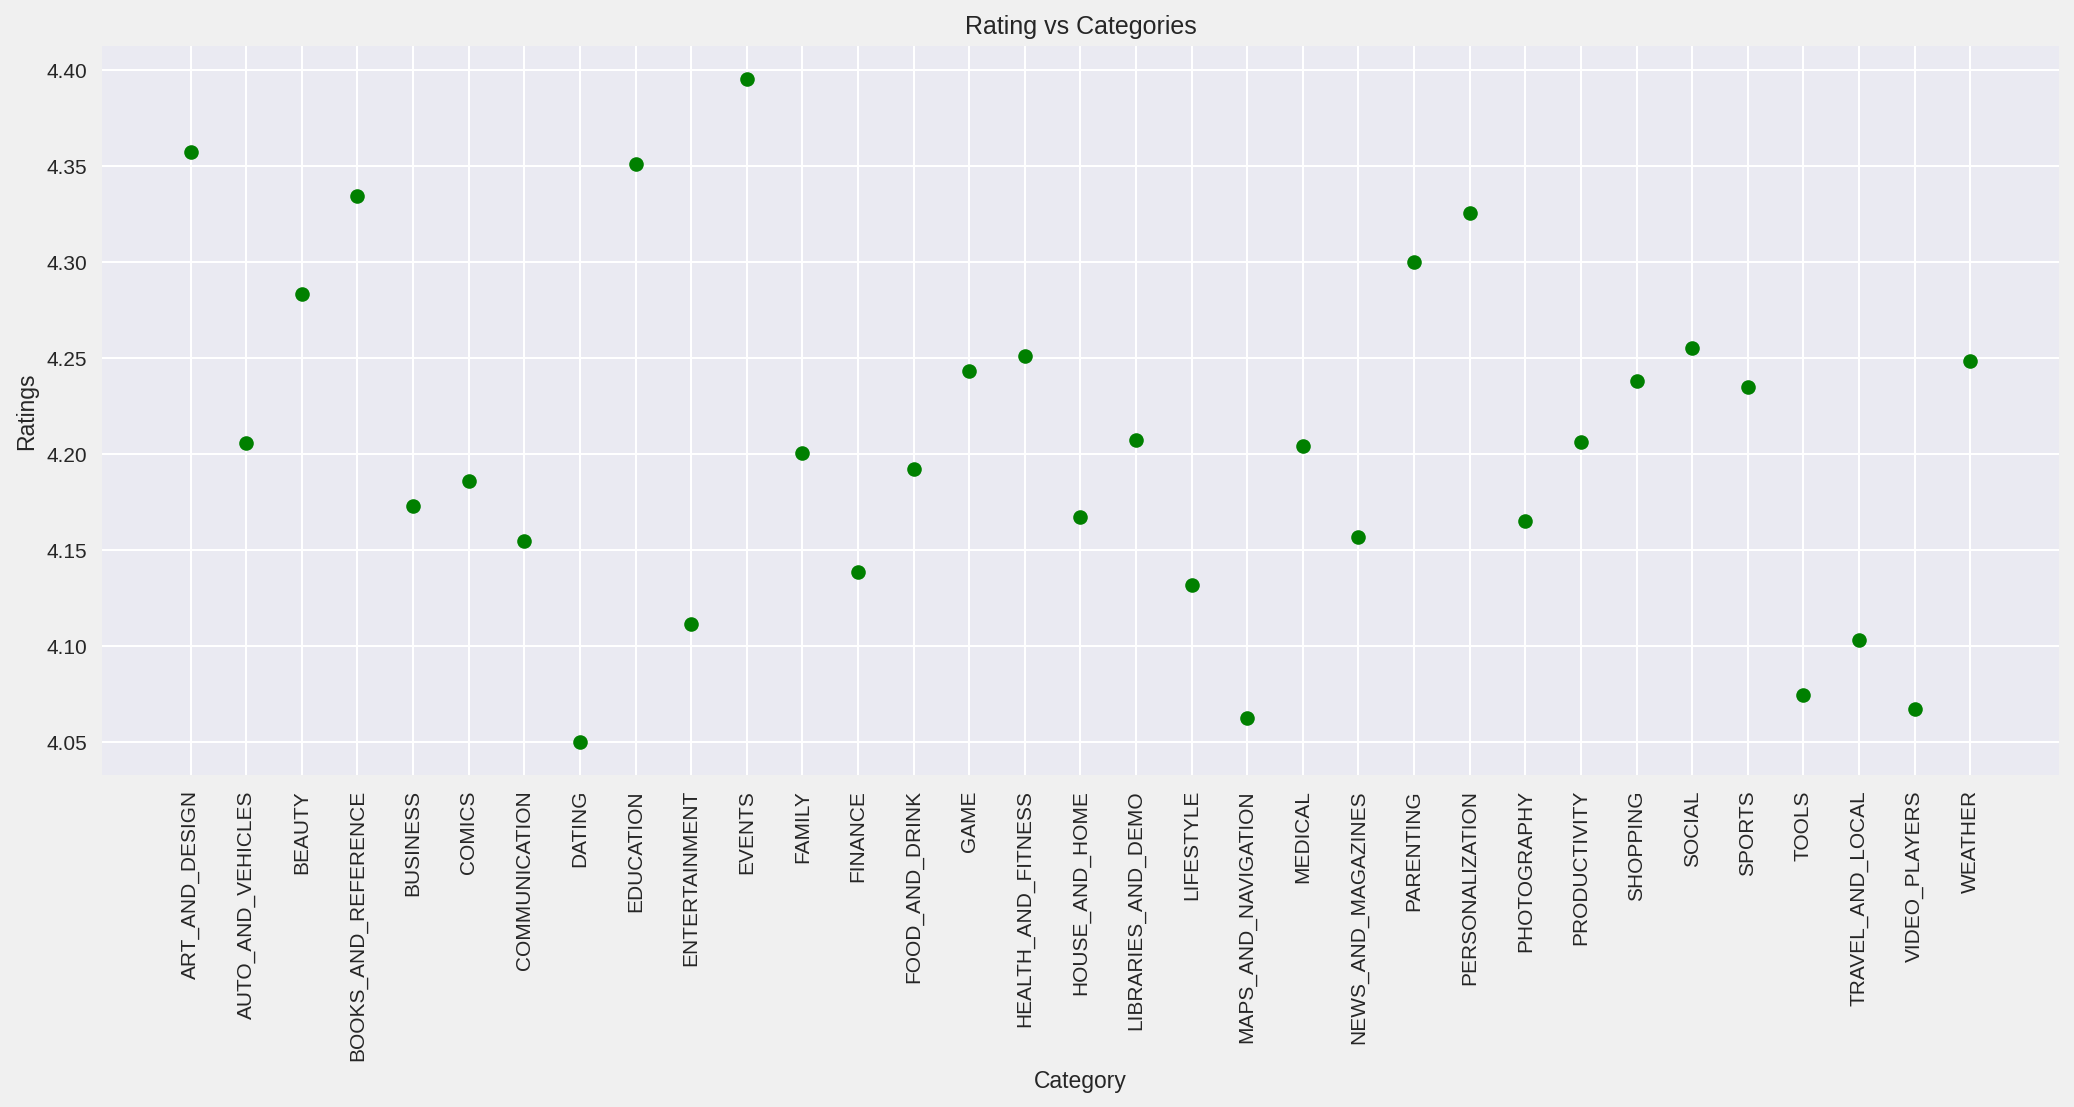

In [ ]:
#plt.style.use('fivethirtyeight')

plt.figure(figsize = (15,6),dpi = 150)
plt.style.use('seaborn')
plt.plot(x,'ro', color='green')
plt.xticks(rotation = 90)
plt.title('Rating vs Categories')
plt.xlabel('Category')
plt.ylabel('Ratings')
plt.show()

Price Vs Categories 

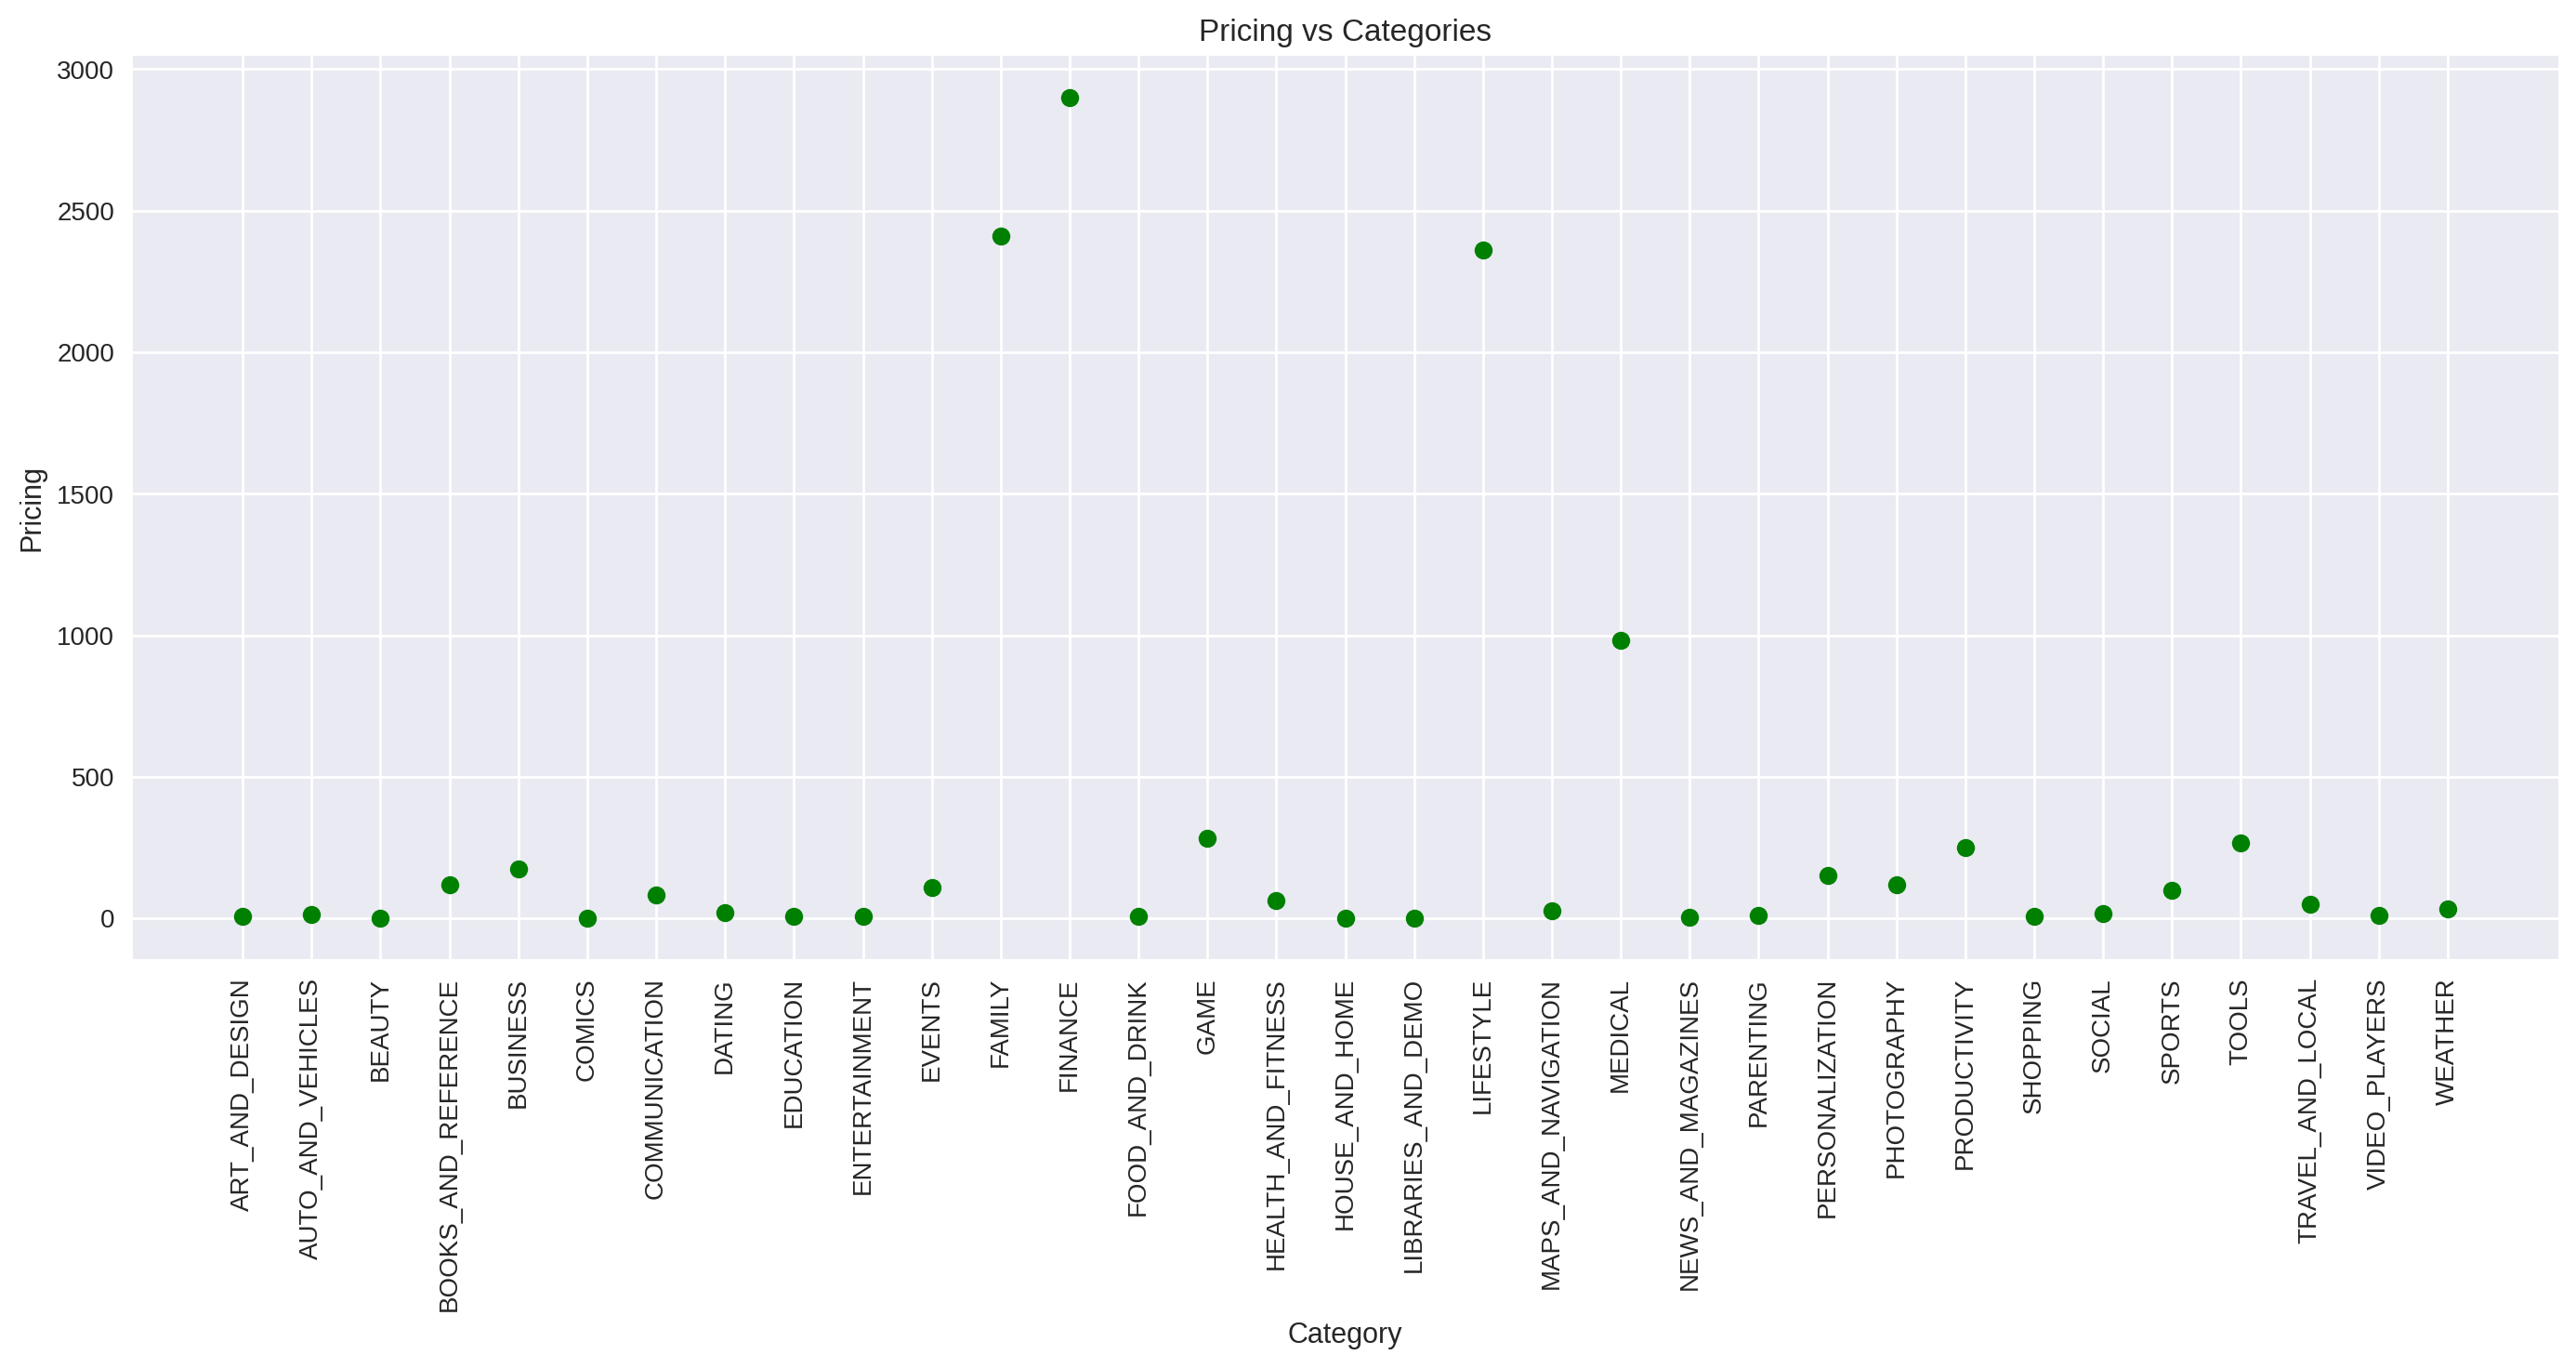

In [ ]:
#plt.style.use('fivethirtyeight')

plt.figure(figsize = (15,6),dpi = 200)
plt.style.use('seaborn')
plt.plot(y,'ro', color='green')
plt.xticks(rotation = 90)
plt.title('Pricing vs Categories')
plt.xlabel('Category')
plt.ylabel('Pricing')
plt.show()

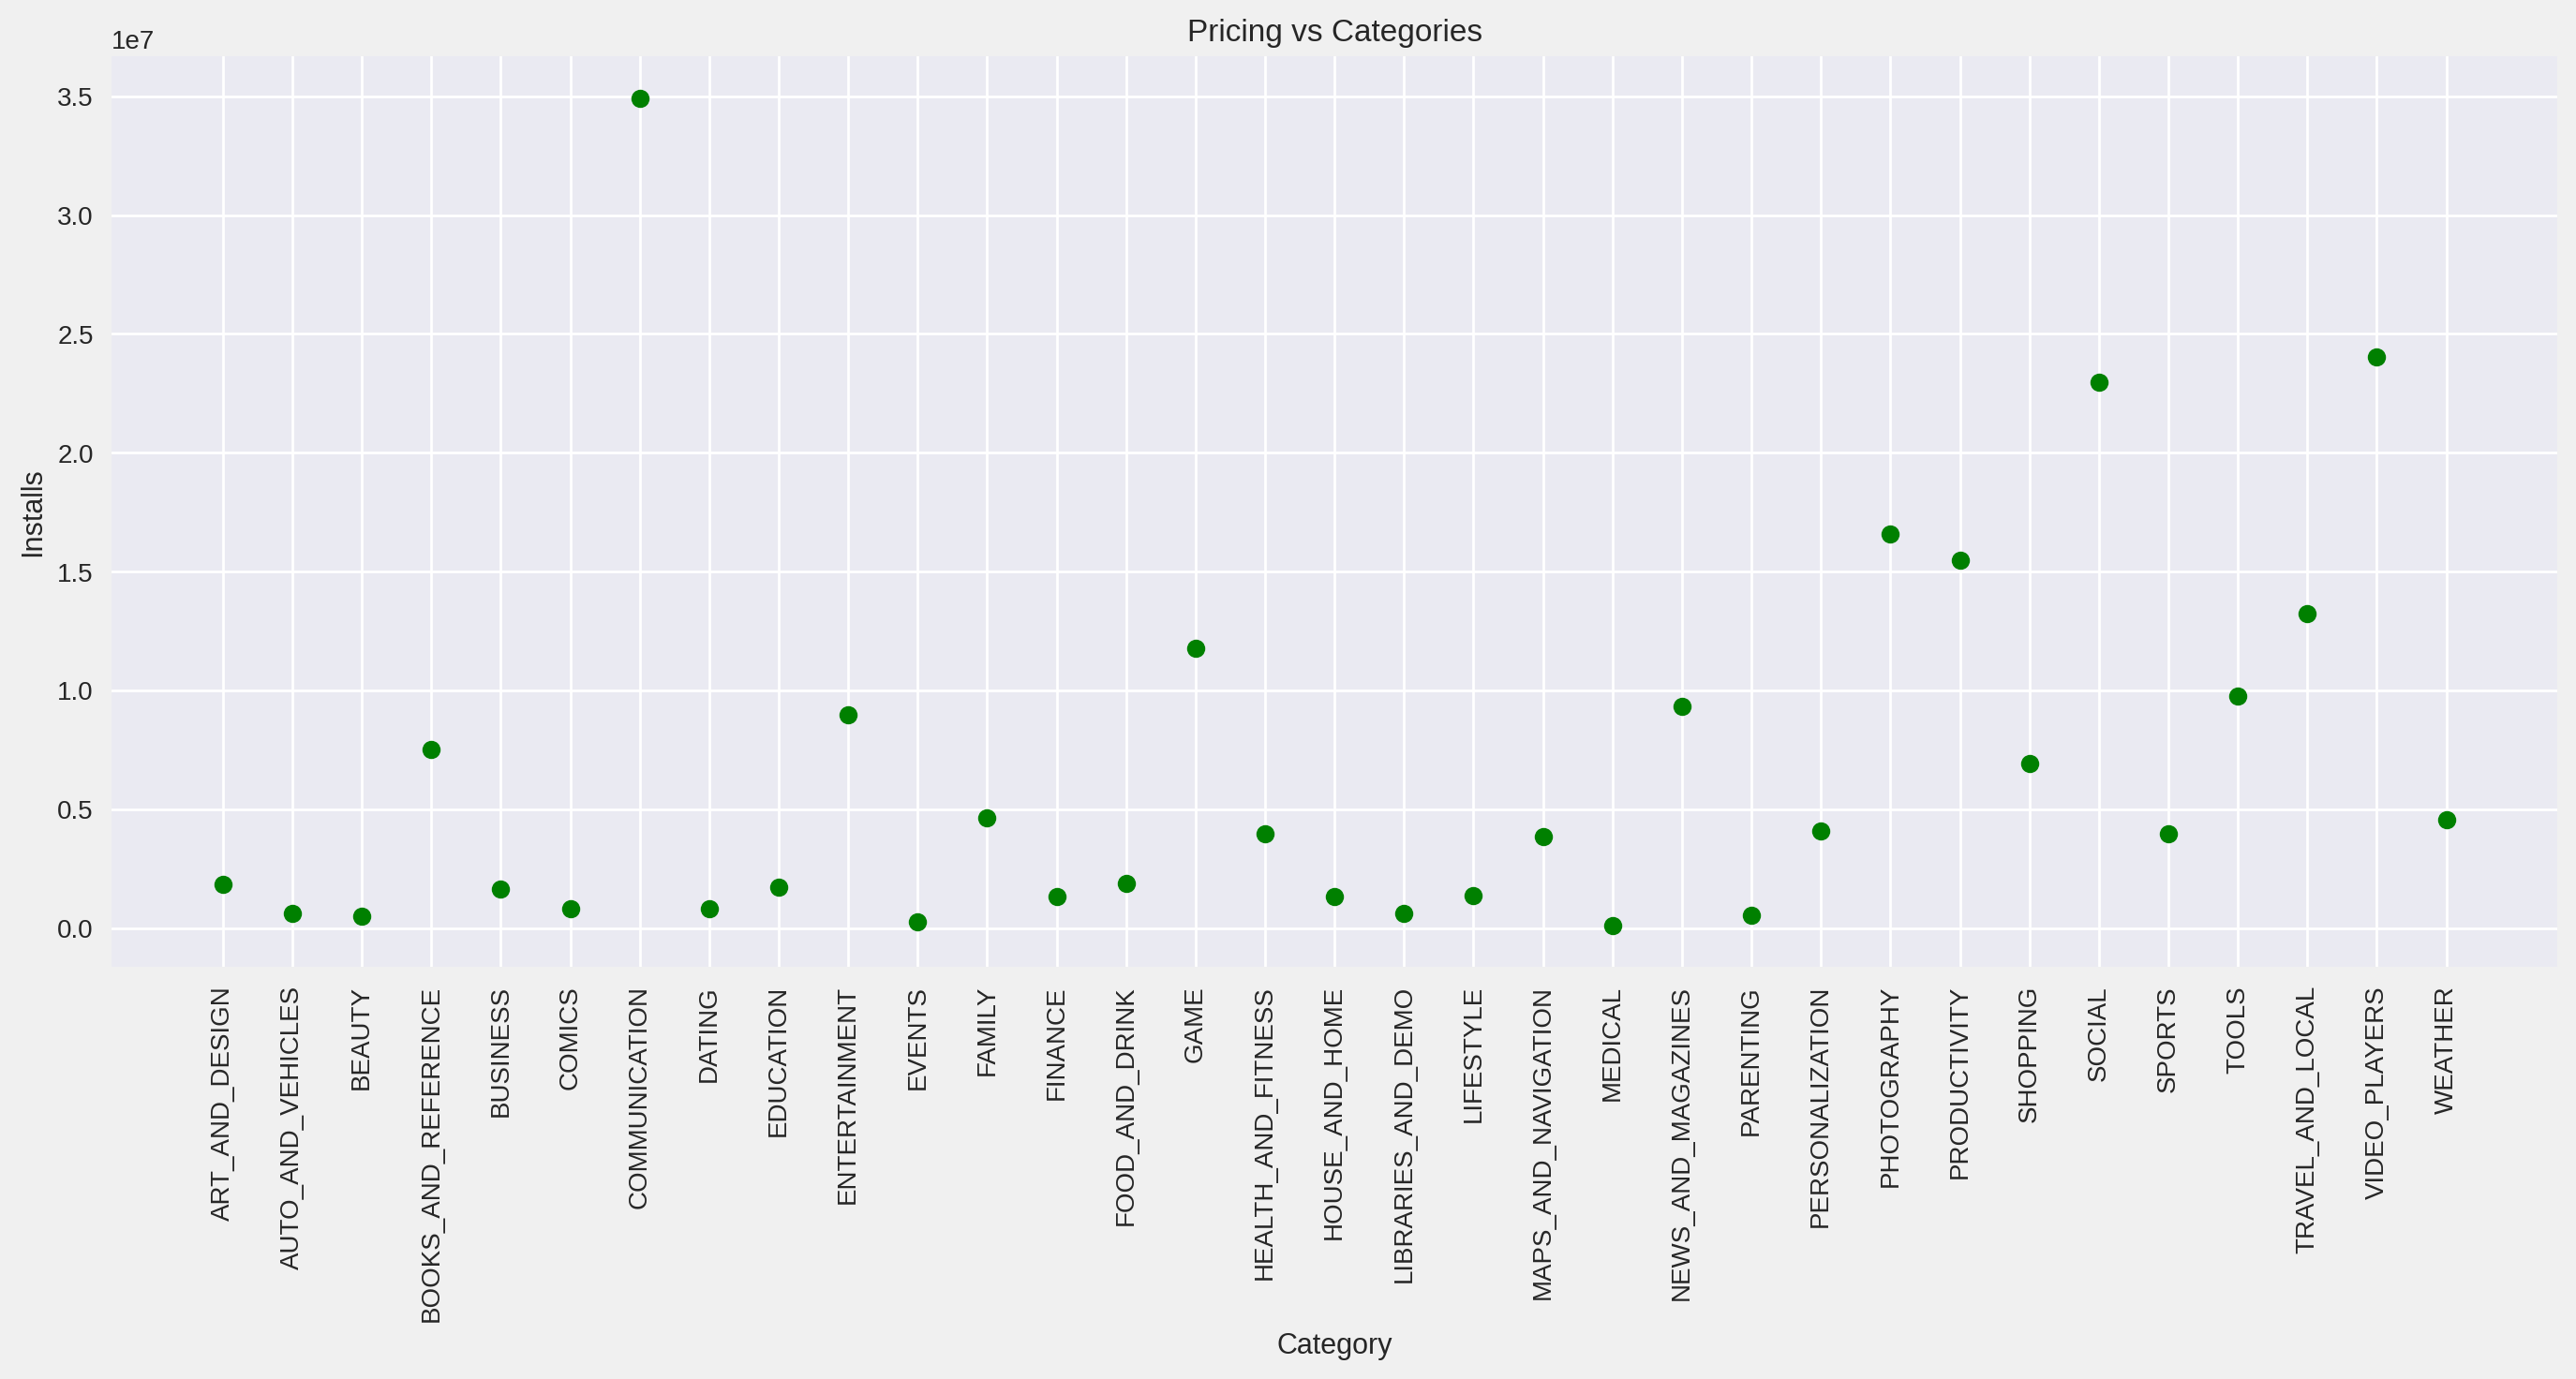

In [ ]:
plt.style.use('fivethirtyeight')

plt.figure(figsize = (15,6),dpi=200)
plt.style.use('seaborn')
plt.plot(z,'ro', color='green')
plt.xticks(rotation = 90)
plt.title('Pricing vs Categories')
plt.xlabel('Category')
plt.ylabel('Installs')
plt.show()

In [ ]:
playstore_df

,App,Category,Rating,Reviews,Size,Installs,...,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,4.3,27.0,3.6M,500.0,...,Everyone,Sports,"October 7, 2017",0.22,4.1 and up,0.0
8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467.0,22M,1000000.0,...,Everyone,Social,"August 2, 2018",5.03,4.1 and up,0.0
324,- Free Comics - Comic Apps,COMICS,3.5,115.0,9.1M,10000.0,...,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up,0.0
4541,.R,TOOLS,4.5,259.0,203k,10000.0,...,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up,0.0
4636,/u/app,COMMUNICATION,4.7,573.0,53M,10000.0,...,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6334,"뽕티비 - 개인방송, 인터넷방송, BJ방송",VIDEO_PLAYERS,4.3,414.0,59M,100000.0,...,Mature 17+,Video Players & Editors,"July 18, 2018",4.0.7,4.0.3 and up,0.0
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,26M,10000.0,...,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up,3999900.0
2575,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.6,22098.0,18M,1000000.0,...,Everyone,Social,"July 24, 2018",4.2.4,4.0.3 and up,0.0
7559,📏 Smart Ruler ↔️ cm/inch measuring for homework!,TOOLS,4.0,19.0,3.2M,10000.0,...,Everyone,Tools,"October 21, 2017",1.0,4.2 and up,0.0


## Demography (Age) Group analysis

In [ ]:
data = playstore_df['Content Rating'].value_counts()
data

Everyone           7903
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

Text(0.5, 0, 'Age Group')

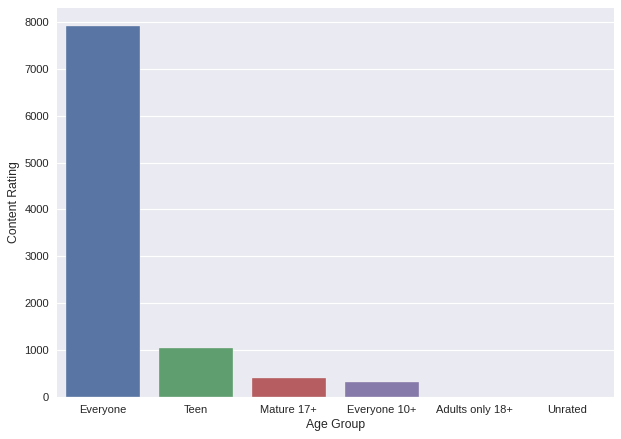

In [ ]:
plt.figure(figsize=(8,6),dpi=80)
sns.barplot(x = data.index,y=data)
plt.xlabel('Age Group')

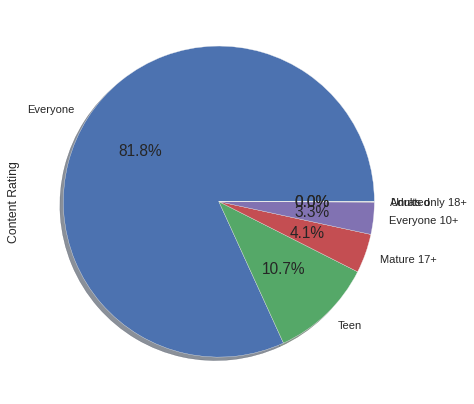

In [ ]:
plt.figure(figsize=(6,6),dpi = 80)
data.plot.pie(explode=[0,0.0,0,0,0,0],autopct="%1.1f%%",shadow=True)
plt.show()

In [ ]:
new_col = playstore_df[['Price','Rating','Installs','Reviews']]

In [ ]:
new_col.head()

,Price,Rating,Installs,Reviews
8884,0.0,4.3,500.0,27.0
8532,0.0,4.5,1000000.0,40467.0
324,0.0,3.5,10000.0,115.0
4541,0.0,4.5,10000.0,259.0
4636,0.0,4.7,10000.0,573.0


# Plotting the heatmap for correlation matrix

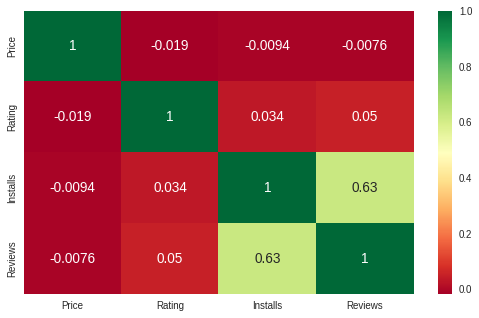

In [ ]:
plt.figure(figsize=(8,5),dpi = 70)
corrMatrix = new_col.corr()
sns.heatmap(corrMatrix, annot=True,cmap ='RdYlGn')
plt.show()

In [ ]:
corrMatrix = playstore_df.corr()
print(corrMatrix)

            Rating   Reviews  Installs     Price   Revenue
Rating    1.000000  0.050255  0.034368 -0.018568  0.006791
Reviews   0.050255  1.000000  0.625029 -0.007588  0.007444
Installs  0.034368  0.625029  1.000000 -0.009406 -0.003092
Price    -0.018568 -0.007588 -0.009406  1.000000  0.247889
Revenue   0.006791  0.007444 -0.003092  0.247889  1.000000


In [ ]:
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,...,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,4.3,27.0,3.6M,500.0,...,Everyone,Sports,"October 7, 2017",0.22,4.1 and up,0.0
8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467.0,22M,1000000.0,...,Everyone,Social,"August 2, 2018",5.03,4.1 and up,0.0
324,- Free Comics - Comic Apps,COMICS,3.5,115.0,9.1M,10000.0,...,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up,0.0
4541,.R,TOOLS,4.5,259.0,203k,10000.0,...,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up,0.0
4636,/u/app,COMMUNICATION,4.7,573.0,53M,10000.0,...,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up,0.0


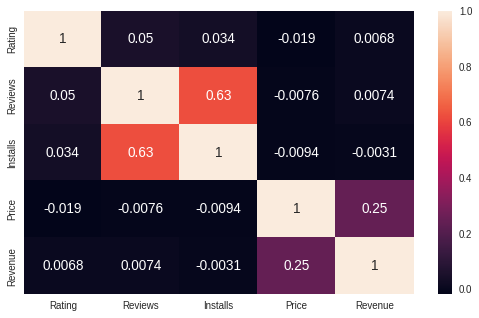

In [ ]:
plt.figure(figsize=(8,5),dpi = 70)
corrMatrix = playstore_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

From the above heatmap we can consider few things -
- Rating has less negative correlation with Price 
- Reviews has less negative correlation with Price
- Number of installations show little negaitive correlation with Price

- Reviews and the number of installations are highly correlated
- Reviews and Ratings are very less positive correlated 
- Number of installations and Price are little positive correlated 

In [ ]:
new_col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 8884 to 882
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     9659 non-null   float64
 1   Rating    9659 non-null   float64
 2   Installs  9659 non-null   float64
 3   Reviews   9659 non-null   float64
dtypes: float64(4)
memory usage: 697.3 KB


In [ ]:
top_cat = playstore_df['Category'].value_counts()

In [ ]:
pd.DataFrame(top_cat.head(10))

,Category
FAMILY,1906
GAME,926
TOOLS,829
BUSINESS,419
MEDICAL,396
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345
SPORTS,327


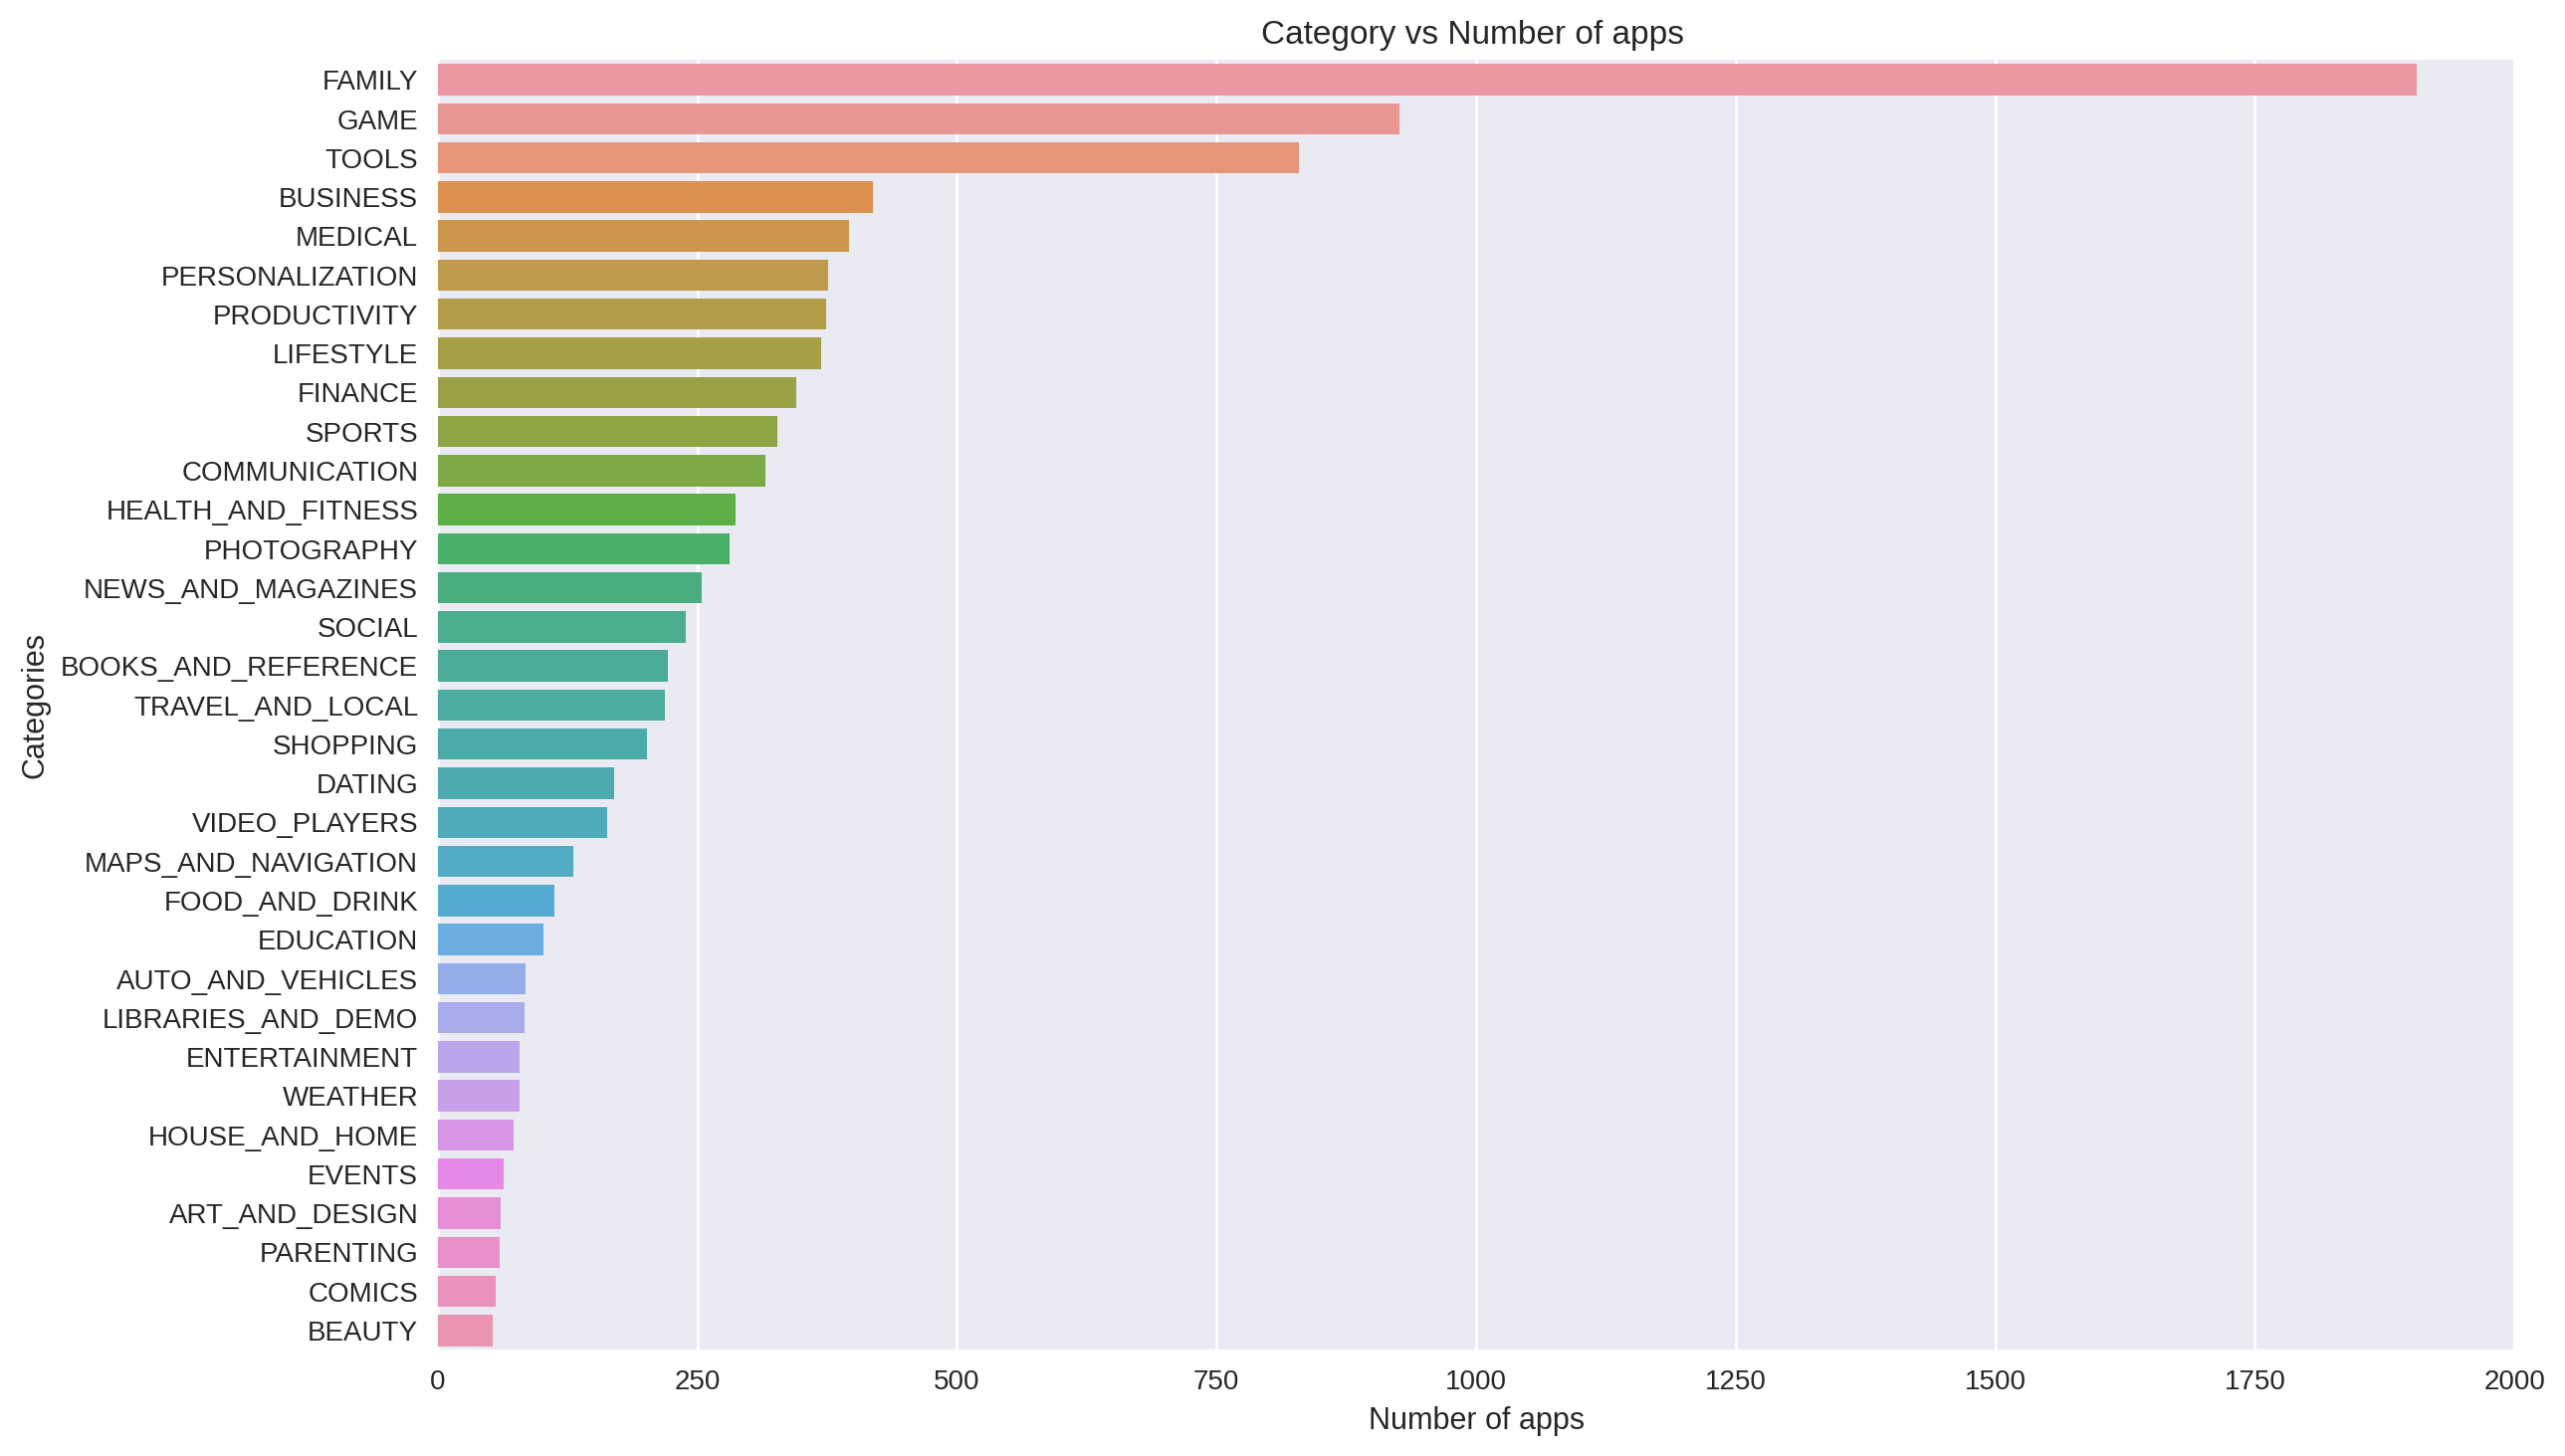

In [ ]:
plt.figure(figsize=(12,8),dpi = 200)
sns.barplot(y = top_cat.index, x=top_cat)
sns.color_palette("tab10")
plt.xlabel('Number of apps')
plt.title('Category vs Number of apps ')
plt.ylabel('Categories')
plt.show()

In [ ]:
ins_val = playstore_df[['Category','Installs']].sort_values(by = 'Installs',ascending=False)

In [ ]:
ins_val.value_counts()


Category             Installs  
FAMILY               1000000.0     268
                     100000.0      251
                     10000.0       229
                     1000.0        214
GAME                 10000000.0    174
                                  ... 
MEDICAL              0.0             1
MAPS_AND_NAVIGATION  50.0            1
COMICS               10000000.0      1
COMMUNICATION        1.0             1
ART_AND_DESIGN       0.0             1
Length: 512, dtype: int64

# Getting insights about the apps

###  Top 5 apps based on the Rating

In [ ]:
top_Rating = playstore_df[['App','Category','Rating']].sort_values(by = ['Rating'], ascending = False).head(5)
top_Rating

,App,Category,Rating
10357,Ríos de Fe,LIFESTYLE,5.0
9806,Dr. ES PV Calculator,TOOLS,5.0
6593,BP Journal - Blood Pressure Diary,MEDICAL,5.0
5763,Tozer Devotional -Series 1,BOOKS_AND_REFERENCE,5.0
6604,BP Log lite,LIFESTYLE,5.0


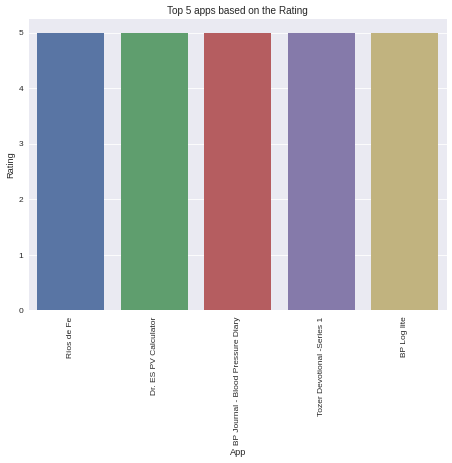

In [ ]:
plt.figure(figsize=(8,6),dpi=60)
sns.barplot(x=top_Rating['App'], y = top_Rating['Rating'])
plt.title('Top 5 apps based on the Rating')
plt.xticks(rotation = 90)
plt.show()

###  Top 5 apps based on the Reviews

In [ ]:
top_Reviews = playstore_df[['App','Category','Reviews']].sort_values(by=['Reviews'], ascending = False).head(5)
top_Reviews

,App,Category,Reviews
3943,Facebook,SOCIAL,78128208.0
3904,WhatsApp Messenger,COMMUNICATION,69109672.0
3909,Instagram,SOCIAL,66509917.0
4104,Messenger – Text and Video Chat for Free,COMMUNICATION,56642847.0
3986,Clash of Clans,FAMILY,44881447.0


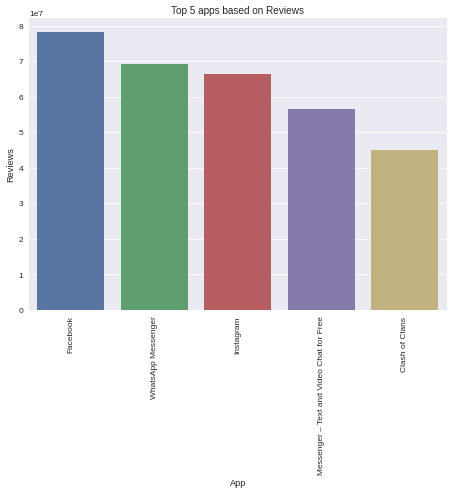

In [ ]:
plt.figure(figsize=(8,6),dpi=60)
sns.barplot(x=top_Reviews['App'], y = top_Reviews['Reviews'])
plt.xticks(rotation = 90)
plt.title("Top 5 apps based on Reviews")
plt.show()

### Top 5 negative apps based on the Rating

In [ ]:
top_neg = playstore_df[['App','Category','Rating']].sort_values(by = ['Rating'], ascending = True).head(5)
top_neg

,App,Category,Rating
7806,CR Magazine,BUSINESS,1.0
6319,BJ Bridge Standard American 2018,GAME,1.0
7383,Thistletown CI,PRODUCTIVITY,1.0
8820,DS Creator 2.0,TOOLS,1.0
7926,Tech CU Card Manager,FINANCE,1.0


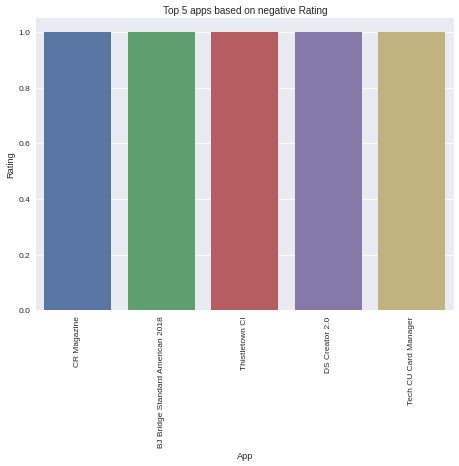

In [ ]:
plt.figure(figsize=(8,6),dpi=60)
sns.barplot(x=top_neg['App'], y = top_neg['Rating'])
plt.xticks(rotation = 90)
plt.title("Top 5 apps based on negative Rating")
plt.show()

### Top apps based on Revenue generated 

In [ ]:
rev_df = playstore_df[['App','Revenue']].sort_values(by=['Revenue'],ascending=False).head(10)
rev_df.head(10)

,App,Revenue
4347,Minecraft,69900000.0
5351,I am rich,39999000.0
5356,I Am Rich Premium,19999500.0
4034,Hitman Sniper,9900000.0
7417,Grand Theft Auto: San Andreas,6990000.0
2950,Facetune - For Free,5990000.0
5578,Sleep as Android Unlock,5990000.0
8804,DraStic DS Emulator,4990000.0
4367,I'm Rich - Trump Edition,4000000.0
4362,💎 I'm rich,3999900.0


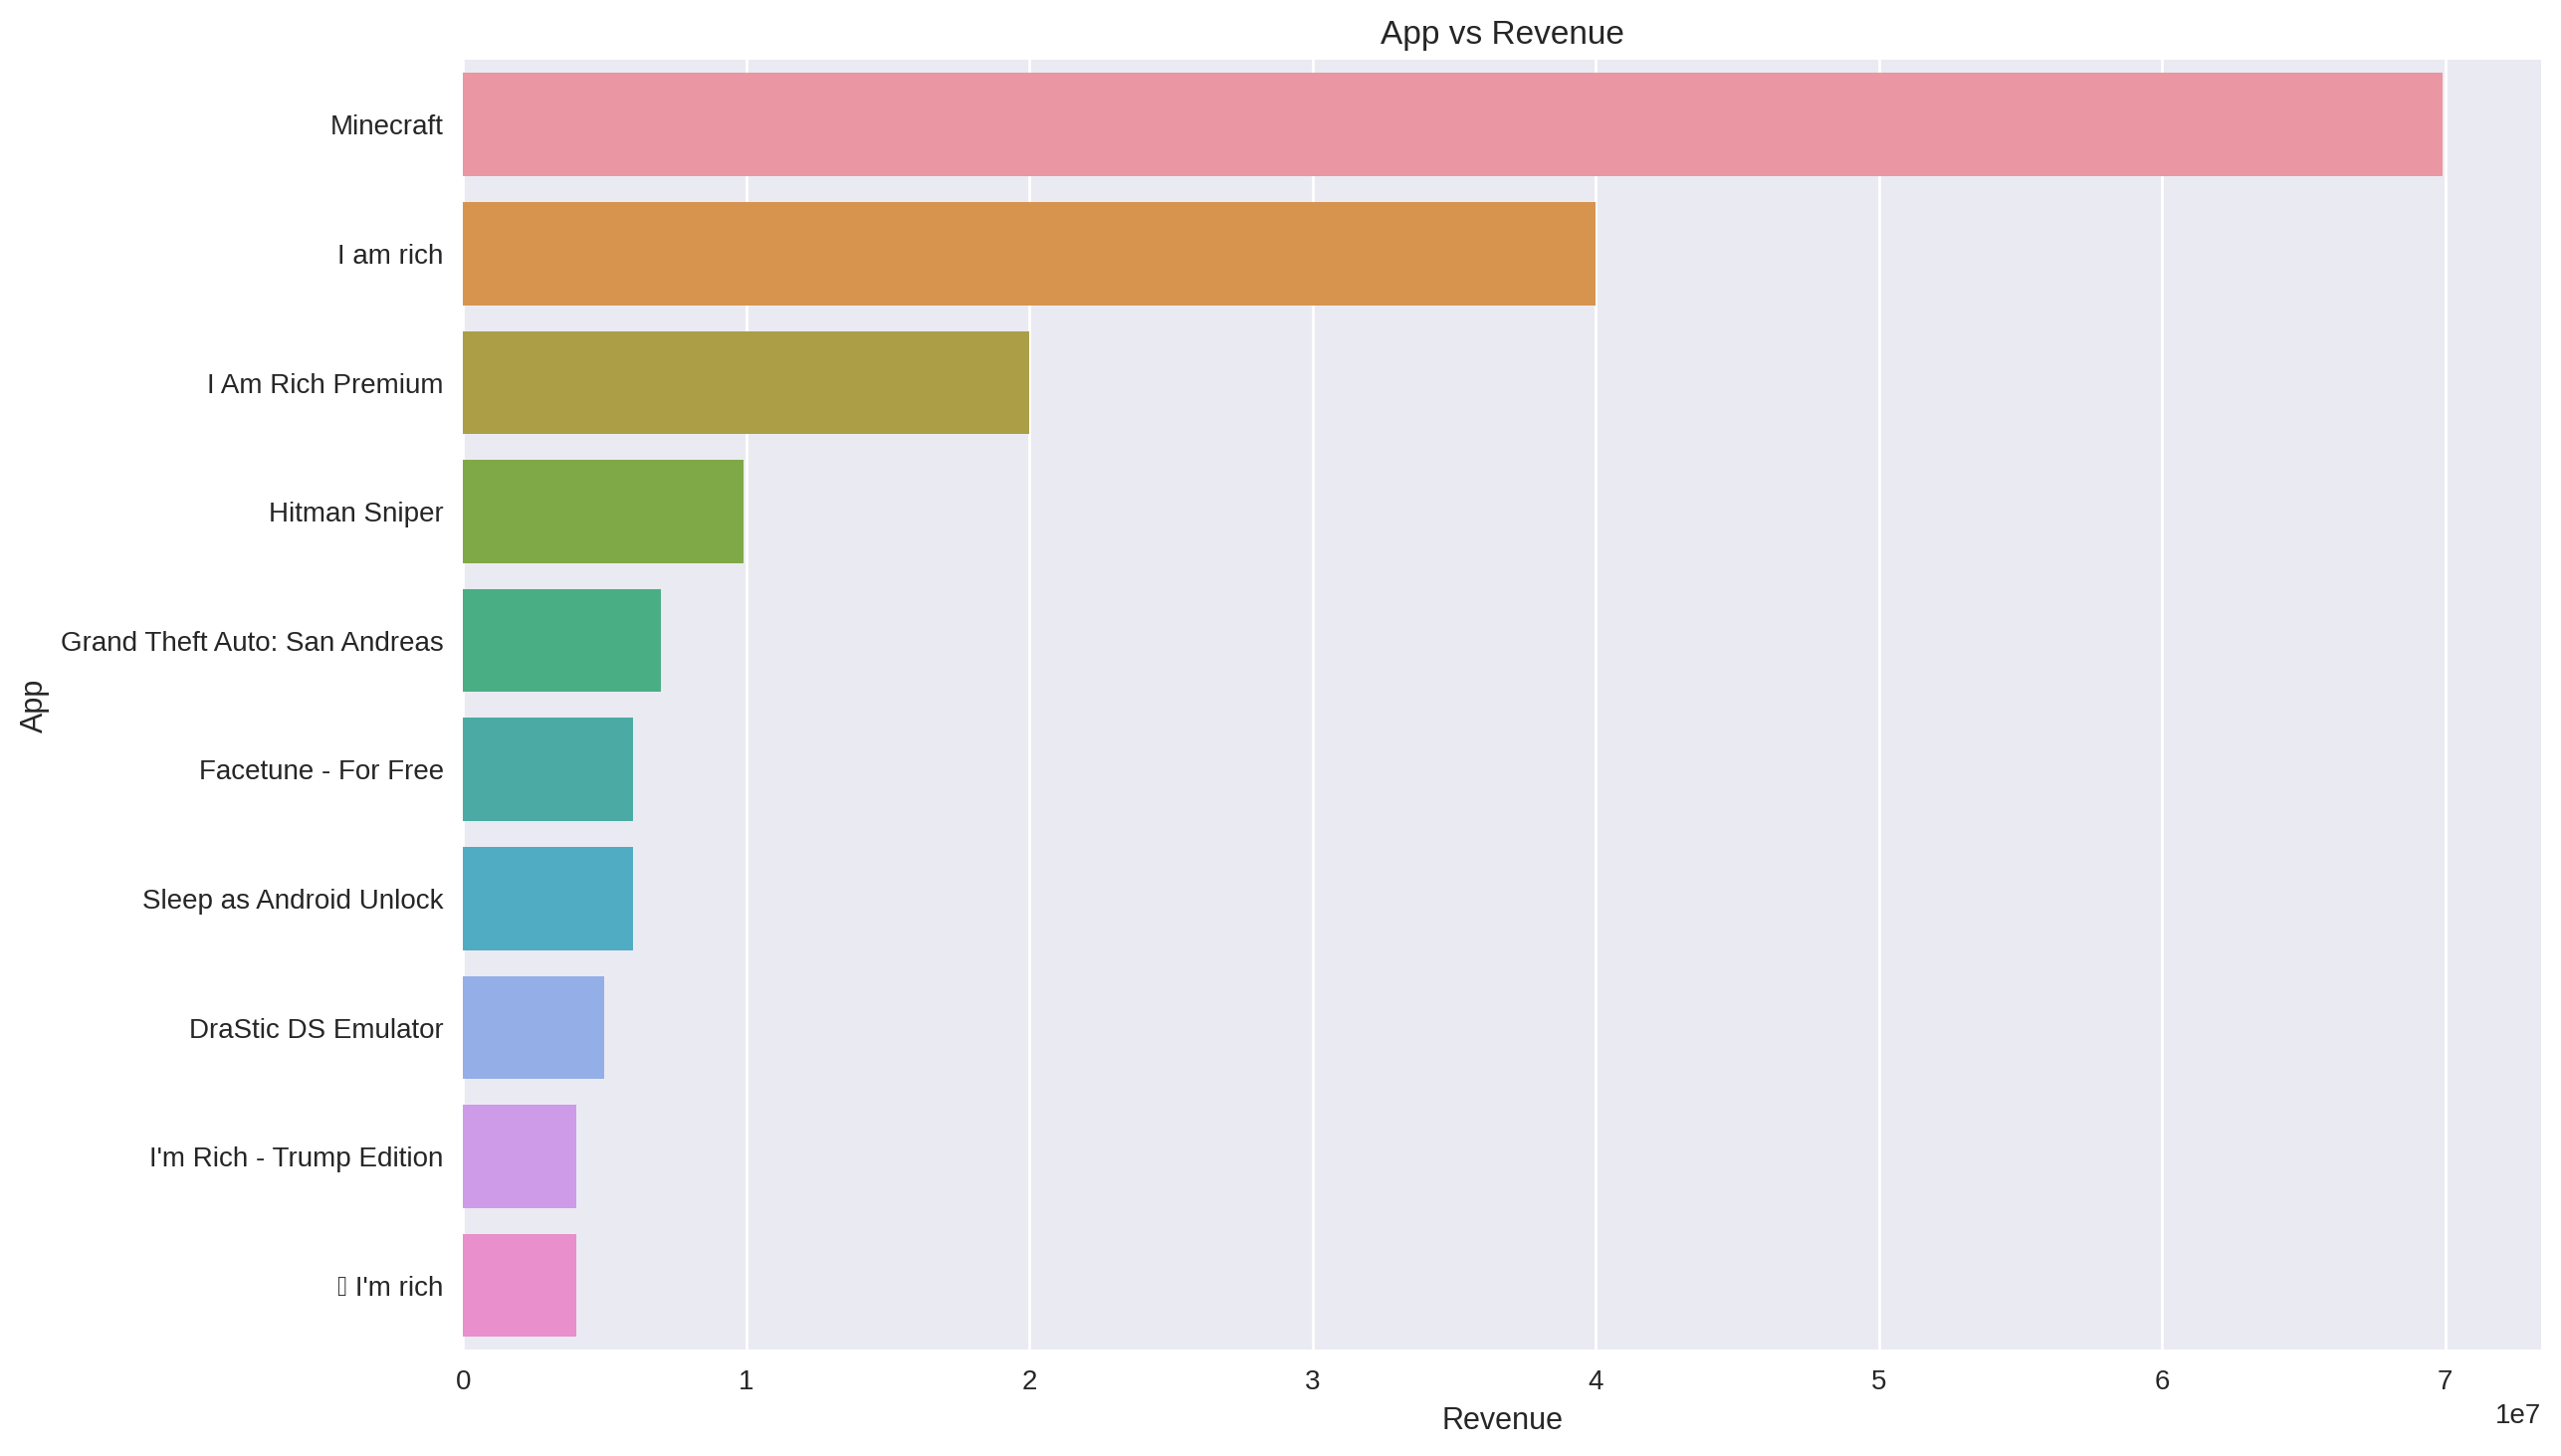

In [ ]:
#Plotting
plt.figure(figsize =(12,8),dpi=200)
sns.barplot(y=rev_df['App'], x=rev_df['Revenue'])
plt.title('App vs Revenue')
plt.show()

### Top Category based on Revenue 

In [ ]:
rev_df_cat = playstore_df[['Category','Revenue']].sort_values(by=['Revenue'],ascending=False).head(20)
rev_df_cat.head(10)

,Category,Revenue
4347,FAMILY,69900000.0
5351,LIFESTYLE,39999000.0
5356,FINANCE,19999500.0
4034,GAME,9900000.0
7417,GAME,6990000.0
2950,PHOTOGRAPHY,5990000.0
5578,LIFESTYLE,5990000.0
8804,GAME,4990000.0
4367,LIFESTYLE,4000000.0
4362,LIFESTYLE,3999900.0


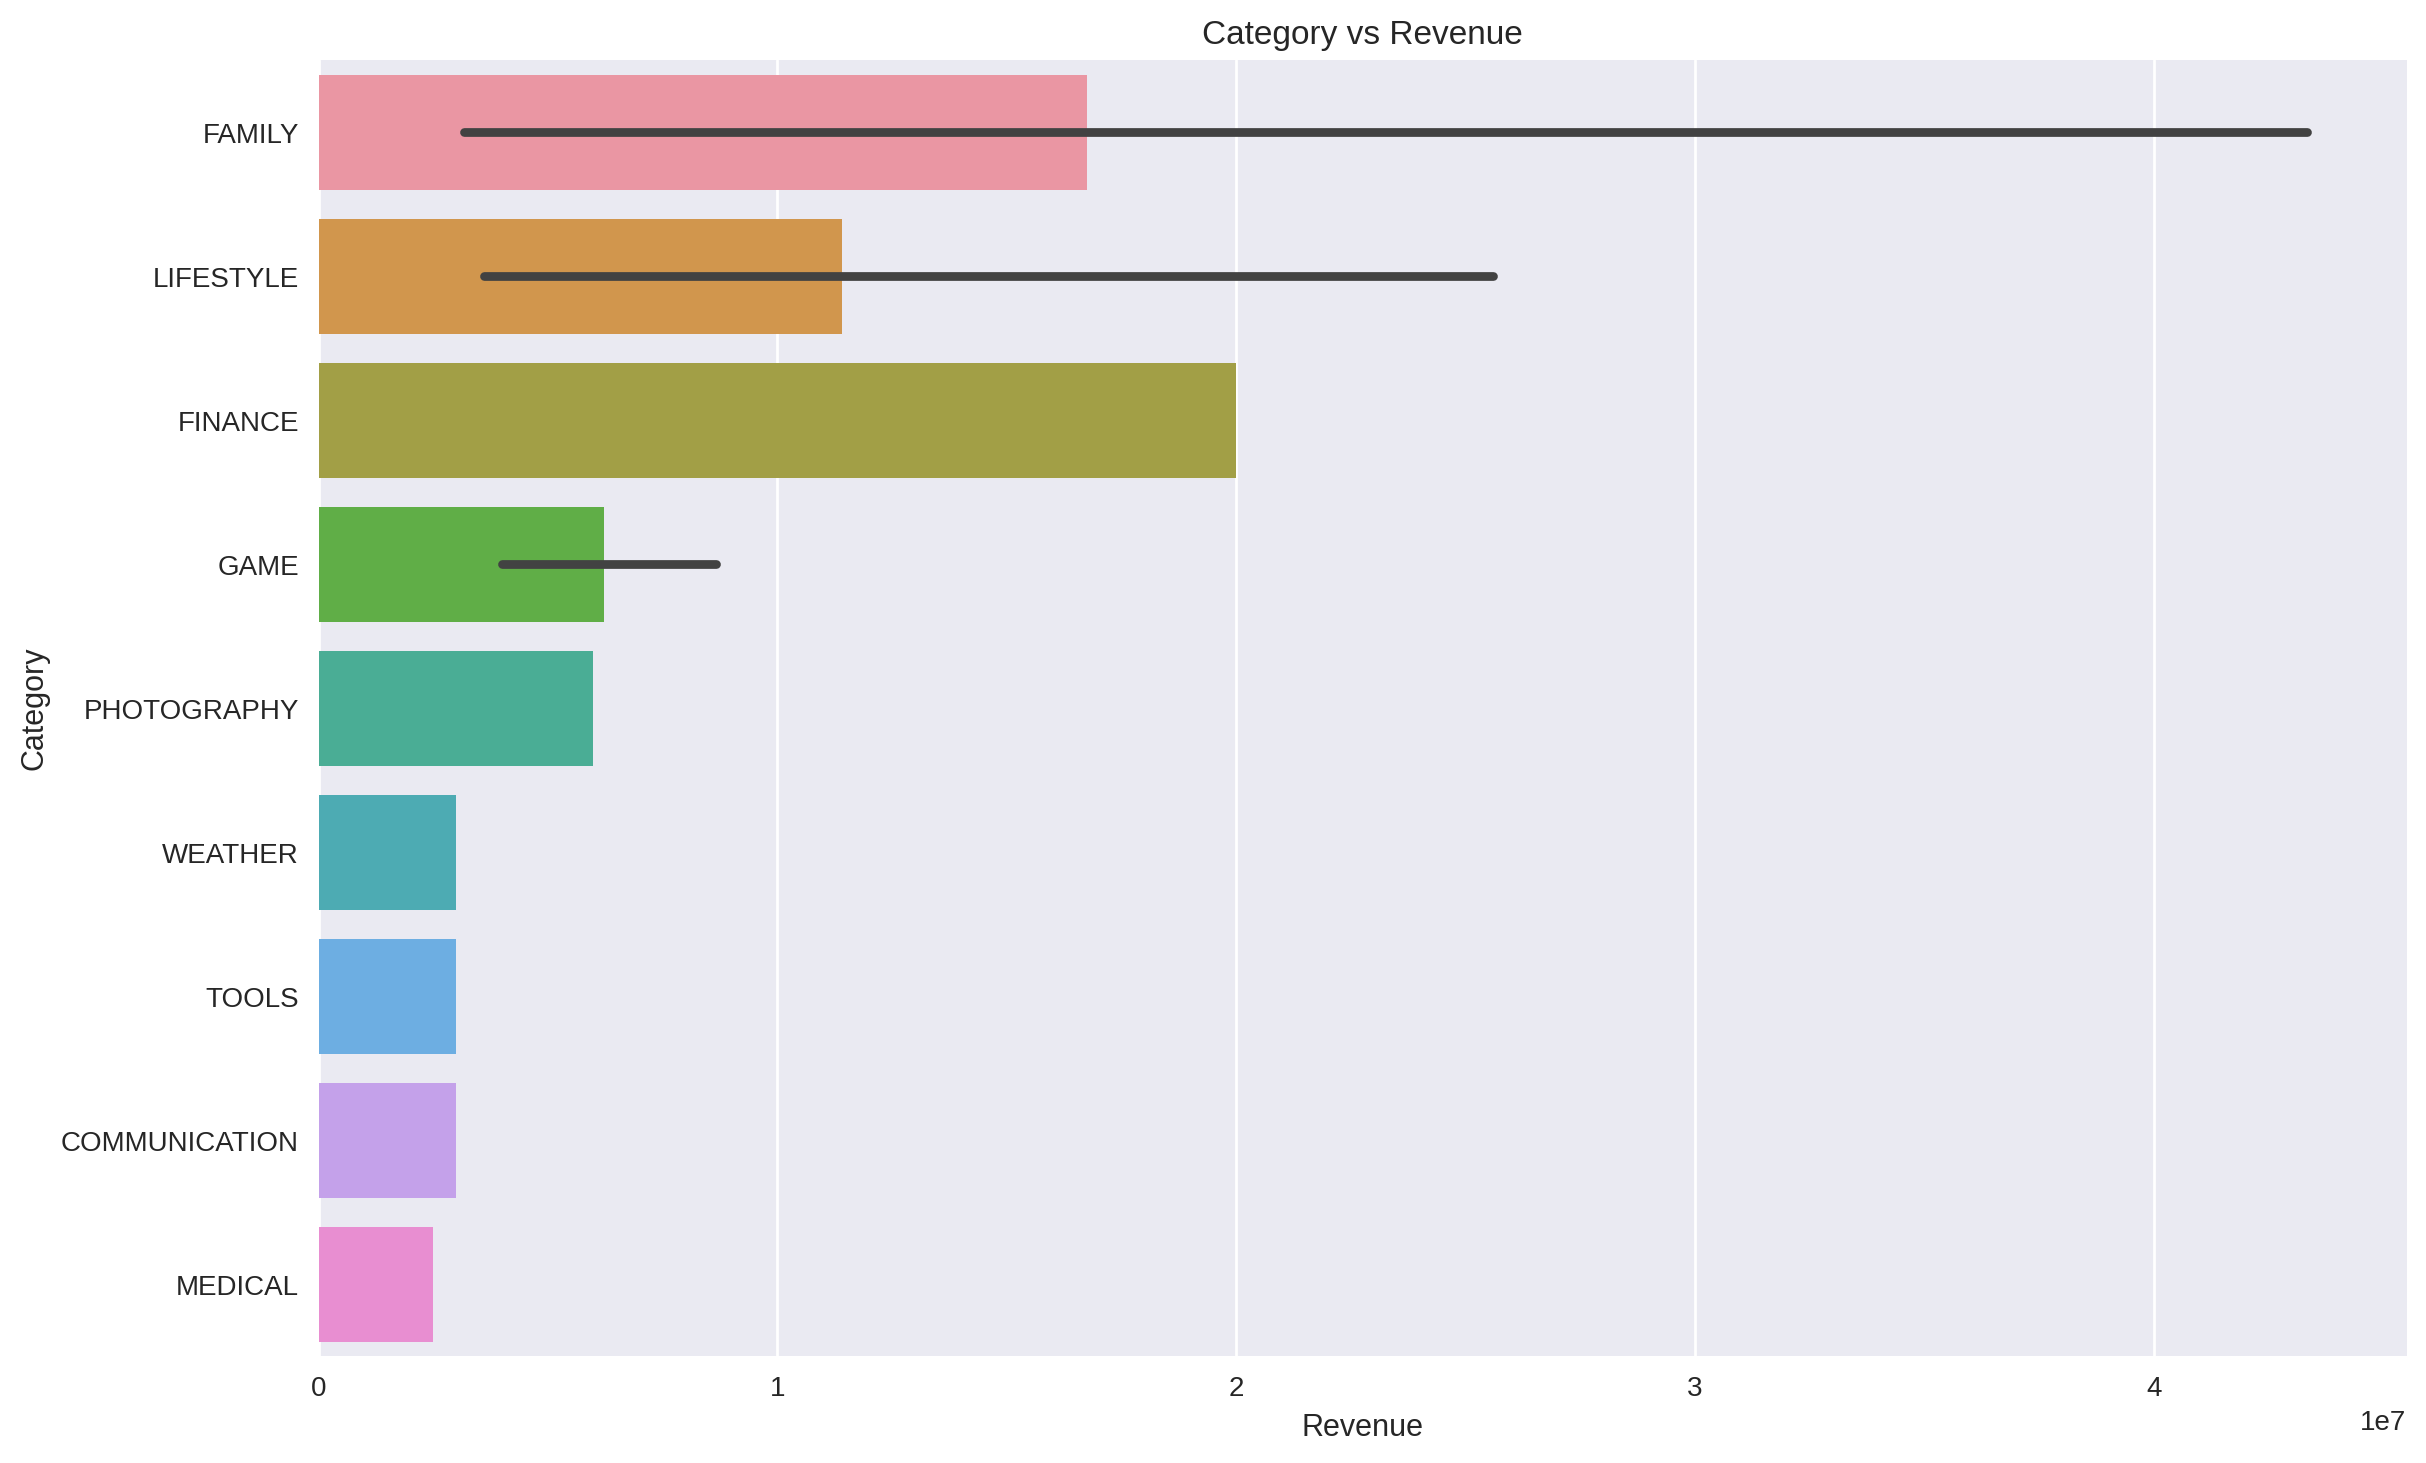

In [ ]:
plt.figure(figsize =(12,8),dpi=200)
sns.barplot(data =rev_df_cat,y=rev_df_cat['Category'], x=rev_df_cat['Revenue'])
plt.title('Category vs Revenue')
plt.show()

# EDA on user reviews

In [ ]:
user_reviews_data = pd.read_csv('/content/drive/MyDrive/CAPSTONE PROJECT  (Almabetter)/ Capstone Project (EDA) Play Store App review /User Review .csv')

In [ ]:
user_reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
user_reviews_data.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


In [ ]:
(user_reviews_data.isnull().sum()/user_reviews_data.isnull().count()) * 100

App                        0.000000
Translated_Review         41.788631
Sentiment                 41.780854
Sentiment_Polarity        41.780854
Sentiment_Subjectivity    41.780854
dtype: float64

In [ ]:
user_reviews = user_reviews_data.copy()

### Checking the Sentiment of the users based on their experience 

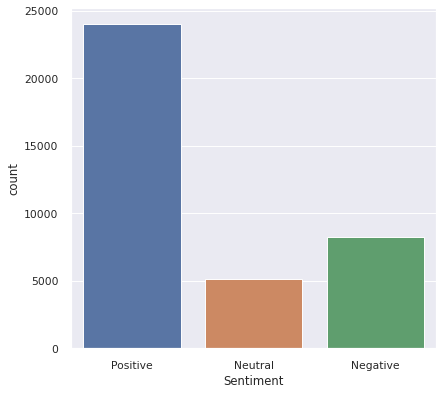

In [ ]:
plt.figure(figsize=(6,6),dpi = 70)
sns.set(style="darkgrid")
sns.countplot(user_reviews['Sentiment'])
plt.show()

In [ ]:
s = user_reviews['Sentiment']

In [ ]:
#Counting the percentage of sentiments 
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent99 = s.value_counts(normalize=True).mul(100).round(1)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})

,counts,per,per100
Positive,23998,0.641109,64.1%
Negative,8271,0.220961,22.1%
Neutral,5163,0.137930,13.8%


In [ ]:
print(percent99)

Positive    64.1
Negative    22.1
Neutral     13.8
Name: Sentiment, dtype: float64


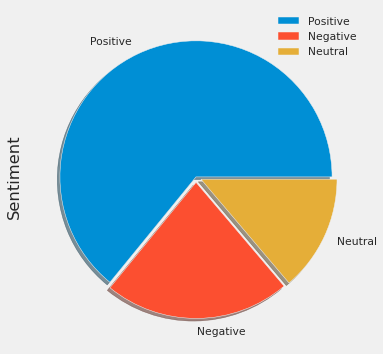

In [ ]:
#Plotting a pie chart to analyse the sentiment and percentage
plt.style.use('fivethirtyeight')
plt.figure(figsize=(6,6),dpi = 70)
percent99.plot.pie(explode=[0,0.04,0.04],shadow=True)
plt.legend()
plt.show()

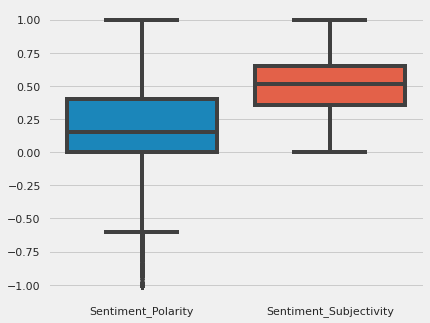

In [ ]:
# Checking the outliers using Box Plot
plt.figure(figsize = (6,5))
sns.boxplot(data = user_reviews)
plt.show()

From the above boxplot we can see that there are no outliers is Sentiment_Subjectivity and Sentiment_Polarity

In [ ]:
(user_reviews.isnull().sum()/user_reviews.isnull().count()) * 100

App                        0.000000
Translated_Review         41.788631
Sentiment                 41.780854
Sentiment_Polarity        41.780854
Sentiment_Subjectivity    41.780854
dtype: float64

In [ ]:
user_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


### Correlation analysis among variables

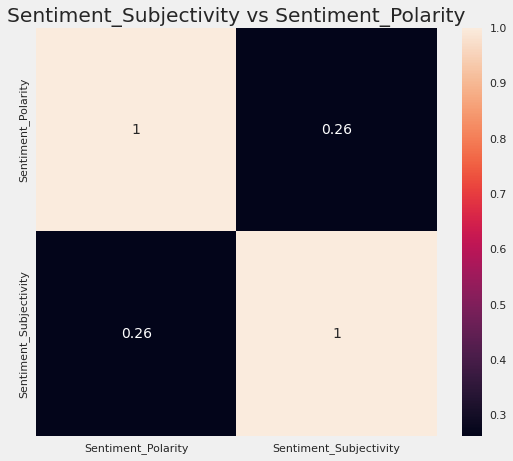

In [ ]:
plt.figure(figsize=(8,7))
corrMatrix = user_reviews.corr()
sns.heatmap(corrMatrix, annot=True)
plt.title("Sentiment_Subjectivity vs Sentiment_Polarity")
plt.show()

- Taking correlation matrix to analyse correlation.
- We can see that there is no correlation between Sentiment_Subjectivity and Sentiment_Polarity

## Merging the two dataframes to do combined data analysis 

In [ ]:
# Using merge to merge two columns 
new_df = playstore_df.merge(user_reviews, on="App")
new_df.head()

,App,Category,Rating,Reviews,Size,Installs,...,Android Ver,Revenue,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3.8M,500000.0,...,2.3.3 and up,0.0,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3.8M,500000.0,...,2.3.3 and up,0.0,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3.8M,500000.0,...,2.3.3 and up,0.0,NaN,NaN,NaN,NaN
3,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3.8M,500000.0,...,2.3.3 and up,0.0,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3.8M,500000.0,...,2.3.3 and up,0.0,Best idea us,Positive,1.00,0.300000


In [ ]:
category_sentiment = new_df.groupby(['Category','Sentiment']).size().reset_index(name='Sentiment Count')
category_sentiment = category_sentiment.pivot('Category', 'Sentiment', 'Sentiment Count').fillna(0).reset_index().set_index('Category')

In [ ]:
category_sentiment.head()

Sentiment,Negative,Neutral,Positive
Category,,,
ART_AND_DESIGN,47,58,233
AUTO_AND_VEHICLES,17,36,236
BEAUTY,65,88,185
BOOKS_AND_REFERENCE,95,108,448
BUSINESS,167,258,654


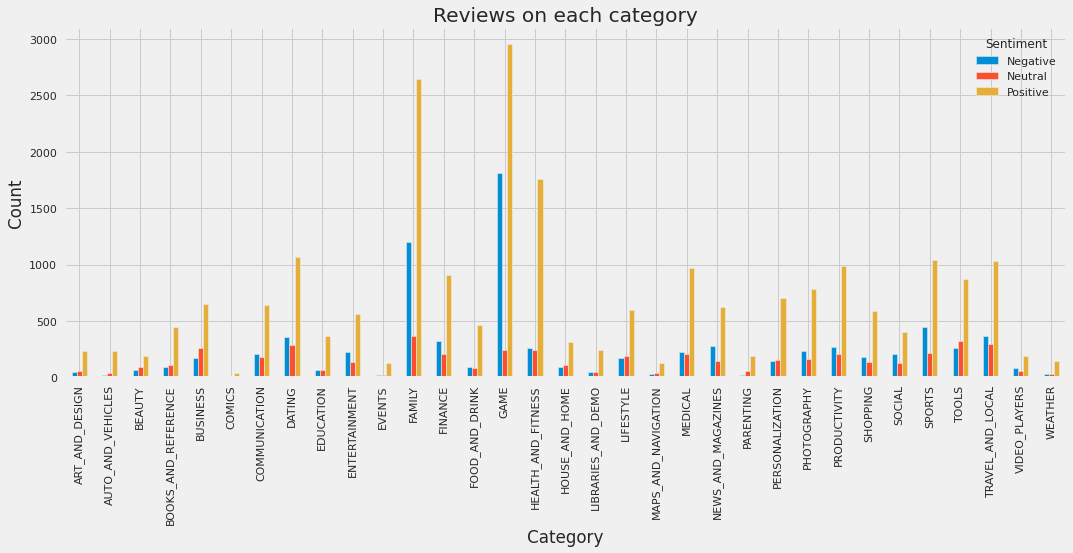

In [ ]:
plt.style.use('fivethirtyeight')
category_sentiment.plot(kind='bar', figsize=(16,6) )
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Reviews on each category")
plt.show()

In [ ]:
new_df['Mean Rates'] = category_sentiment['Positive'] - category_sentiment['Negative']